## Data Collection

###### Import Libraries

In [1]:
import pandas as pd

import numpy as np

import collections
from collections import Counter #keeps track of how many times equivalent values are added

import missingno as msno

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set() #It gives your charts a seaborn background by default

import warnings
warnings.filterwarnings('ignore')

###### Load Data

In [2]:
# Read csv files

#Plant_1_Generation_Data
P1GD = pd.read_csv('Plant_1_Generation_Data.csv') #pd.read_csv returns a new DataFrame with the data and labels from file

#Plant_1_Weather_Sensor_Data
P1WSD = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

#Plant_2_Generation_Data
P2GD = pd.read_csv('Plant_2_Generation_Data.csv')

#Plant_2_Weather_Sensor_Data
P2WSD = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')



# Data from https://www.kaggle.com/anikannal/solar-power-generation-data/discussion/179817#1021614

# Preview the first 5 lines of the loaded data 
for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.head(), "\n")
    print("_"*80, "\n")

  DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0  15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0,0,0...                     
1  15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0,0,0...                     
2  15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0,0,0...                     
3  15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0,0,0...                     
4  15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0,0,0...                      

________________________________________________________________________________ 

  DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0  2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0,...                     
1  2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0,...                     
2  2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0,...                     
3  2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0,...                     
4  2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0,...                      

_________________________

DataFrames have 1 column. CSV files need to be reread and columns split.

In [3]:
# Reread csv file and split DataFrame columns, keeping column names

#Plant_1_Generation_Data
P1GD = pd.read_csv('Plant_1_Generation_Data.csv', sep=",", quoting=3)
P1GD.columns = P1GD.columns.str.strip('" ')
P1GD.iloc[:, [0, -1]] = P1GD.iloc[:, [0, -1]].apply(lambda x: x.str.strip('"'))

# str.strip = Remove leading and trailing characters in Series/Index.
# iloc = Purely integer-location based indexing for selection by position.

#Plant_1_Weather_Sensor_Data
P1WSD = pd.read_csv('Plant_1_Weather_Sensor_Data.csv', sep=",", quoting=3)
P1WSD.columns = P1WSD.columns.str.strip('" ')
P1WSD.iloc[:, [0, -1]] = P1WSD.iloc[:, [0, -1]].apply(lambda x: x.str.strip('"'))

#Plant_2_Generation_Data
P2GD = pd.read_csv('Plant_2_Generation_Data.csv', sep=",", quoting=3)
P2GD.columns = P2GD.columns.str.strip('" ')
P2GD.iloc[:, [0, -1]] = P2GD.iloc[:, [0, -1]].apply(lambda x: x.str.strip('"'))

#Plant_2_Weather_Sensor_Data
P2WSD = pd.read_csv('Plant_2_Weather_Sensor_Data.csv', sep=",", quoting=3)
P2WSD.columns = P2WSD.columns.str.strip('" ')
P2WSD.iloc[:, [0, -1]] = P2WSD.iloc[:, [0, -1]].apply(lambda x: x.str.strip('"'))


#'GD' = generation data
#'WSD' = weather sensor data

In [4]:
#Verify column splits on DataFrames

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.shape, "\n")

(68778, 7) 

(67698, 7) 

(3182, 6) 

(3259, 6) 



## Data Definition

DATE_TIME - Date and time for each observation. Observations recorded at 15 minute intervals.

PLANT_ID- Plant ID - this will be common for the entire file.

SOURCE_KEY - Source key in this file stands for the inverter id or sensor panel id.

DC_POWER - Amount of DC power generated by the inverter (source_key) in this 15 minute intervals. Units - kW.

AC_POWER - Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.

DAILY_YIELD- Daily yield is a cumulative sum of power generated on that day, till that point in time.

TOTAL_YIELD- This is the total yield for the inverter till that point in time.

AMBIENT_TEMPERATURE- This is the ambient temperature at the plant.

MODULE_TEMPERATURE- There's a module (solar panel) attached to the sensor panel. This is the Celsius temperature reading for that module.

IRRADIATION- Amount of irradiation for the 15 minute interval.

Goals of analysis: 

- Can we predict the power generation for next couple of days? - this allows for better grid management
- Can we identify the need for panel cleaning/maintenance?
- Can we identify faulty or suboptimally performing equipment?

In [5]:
# identify data type for each column

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.info(), "\n")
    print("*"*80, "\n")
    #print(df.value_counts(normalize=True)) #returns the relative frequency by dividing all values by the sum of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 3.7+ MB
None 

******************************************************************************** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4

GD has 7 features while WSD has 6 features. The number of entries per feature across datasets is not the same. There was no return of null values but clearly shape varies.

In [6]:
## Quick look over sample values for each feature

P1GD.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
8956,19-05-2020 09:30,4135001,ZnxXDlPa8U1GXgE,8514.857143,832.985714,1000.285714,6549162.286
37721,03-06-2020 04:30,4135001,ih0vzX44oOqAx2f,0.000000,0.000000,0.000000,6321311
4839,17-05-2020 10:45,4135001,VHMLBKoKgIrUVDU,11504.500000,1122.062500,2623.250000,7222003.25
15144,22-05-2020 23:30,4135001,wCURE6d3bPkepu2,0.000000,0.000000,0.000000,6839225
49978,09-06-2020 01:45,4135001,adLQvlD726eNBSB,0.000000,0.000000,0.000000,6462004
26749,28-05-2020 15:00,4135001,VHMLBKoKgIrUVDU,9948.625000,972.762500,7241.875000,7311619.875
49197,08-06-2020 16:45,4135001,zVJPv84UY57bAof,5704.250000,559.075000,8048.750000,7301838.75
29407,30-05-2020 05:45,4135001,YxYtjZvoooNbGkE,0.000000,0.000000,0.000000,7292503
49387,08-06-2020 19:00,4135001,ih0vzX44oOqAx2f,0.000000,0.000000,8217.000000,6366909
50541,09-06-2020 08:15,4135001,1IF53ai7Xc0U56Y,6664.571429,652.800000,574.428571,6372407.429


In [7]:
P1WSD.sample(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1445,2020-05-30 21:30:00,4135001,HmiyD2TTLFNqkNe,23.541683,21.235256,0
937,2020-05-25 10:15:00,4135001,HmiyD2TTLFNqkNe,29.217751,53.501414,0.83415663933333339
692,2020-05-22 19:30:00,4135001,HmiyD2TTLFNqkNe,27.137475,25.587720,0
1331,2020-05-29 17:00:00,4135001,HmiyD2TTLFNqkNe,30.025730,36.704391,0.2275632
1624,2020-06-01 18:15:00,4135001,HmiyD2TTLFNqkNe,25.387085,24.887756,0.020406528366666666
1292,2020-05-29 07:15:00,4135001,HmiyD2TTLFNqkNe,21.808195,26.070054,0.13390085133333335
2468,2020-06-10 13:30:00,4135001,HmiyD2TTLFNqkNe,31.166331,50.699784,0.85274037400000013
526,2020-05-20 19:00:00,4135001,HmiyD2TTLFNqkNe,26.715222,24.047064,0
2122,2020-06-06 23:00:00,4135001,HmiyD2TTLFNqkNe,22.125964,20.276077,0
3136,2020-06-17 12:30:00,4135001,HmiyD2TTLFNqkNe,28.941943,51.340741,0.718821216


## Data Cleaning

In [8]:
# Identify Frequency Count of unique values for each features per DataFrame

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.nunique(axis=0))
    print("_"*80, "\n")

DATE_TIME       3158
PLANT_ID           1
SOURCE_KEY        22
DC_POWER       32909
AC_POWER       32686
DAILY_YIELD    29900
TOTAL_YIELD    37267
dtype: int64
________________________________________________________________________________ 

DATE_TIME       3259
PLANT_ID           1
SOURCE_KEY        22
DC_POWER       30743
AC_POWER       30721
DAILY_YIELD    30345
TOTAL_YIELD    33118
dtype: int64
________________________________________________________________________________ 

DATE_TIME              3182
PLANT_ID                  1
SOURCE_KEY                1
AMBIENT_TEMPERATURE    3182
MODULE_TEMPERATURE     3182
IRRADIATION            1758
dtype: int64
________________________________________________________________________________ 

DATE_TIME              3259
PLANT_ID                  1
SOURCE_KEY                1
AMBIENT_TEMPERATURE    3259
MODULE_TEMPERATURE     3259
IRRADIATION            1863
dtype: int64
_____________________________________________________________________

In [9]:
for df in [P1GD, P2GD]:
    print(df.DC_POWER.value_counts(dropna=False))  #explicitly pass dropna=False to the function to make it return the missing value as well.

0.000000       31951
66.000000          7
78.857143          5
1842.000000        5
376.000000         5
               ...  
6849.571429        1
6878.428571        1
3267.750000        1
9513.000000        1
1186.714286        1
Name: DC_POWER, Length: 32909, dtype: int64
0.000000      35662
0.520000          7
0.526667          5
1.260000          4
1.240000          4
              ...  
153.680000        1
60.786667         1
952.420000        1
826.420000        1
533.550000        1
Name: DC_POWER, Length: 30743, dtype: int64


In [10]:
# Carryout Descriptive Statistics Summary for each features per dataset - high-level understanding

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    #print(df.describe())
    
    pd.options.display.float_format = '{:.5f}'.format
#Assign display.float_format with pandas option to change float format and suppresses scientific notation
    
    print(df.describe())
    

           PLANT_ID    DC_POWER    AC_POWER  DAILY_YIELD
count   68778.00000 68778.00000 68778.00000  68778.00000
mean  4135001.00000  3147.42621   307.80275   3295.96874
std         0.00000  4036.45717   394.39644   3145.17831
min   4135001.00000     0.00000     0.00000      0.00000
25%   4135001.00000     0.00000     0.00000      0.00000
50%   4135001.00000   429.00000    41.49375   2658.71429
75%   4135001.00000  6366.96429   623.61875   6274.00000
max   4135001.00000 14471.12500  1410.95000   9163.00000
           PLANT_ID    DC_POWER    AC_POWER  DAILY_YIELD
count   67698.00000 67698.00000 67698.00000  67698.00000
mean  4136001.00000   246.70196   241.27783   3294.89030
std         0.00000   370.56960   362.11212   2919.44839
min   4136001.00000     0.00000     0.00000      0.00000
25%   4136001.00000     0.00000     0.00000    272.75000
50%   4136001.00000     0.00000     0.00000   2911.00000
75%   4136001.00000   446.59167   438.21500   5534.00000
max   4136001.00000  1420.93333

Insights:

Each Plant has 22 inverters but DATE_TIME does not match. Ideally there would be the same number of  individual observations and shape would be the same for true comparison and prediction. Data is not tidy.

DATE_TIME between Plant 1 datasources does not match. Plant 2 match across both.

DATE_TIME, SOURCE_KEY, TOTAL_YIELD, and IRRADIATION are currently objetcs. SOURCE_KEY will remain since it includes text. DATE_TIME will be converted to datetime64. TOTAL_YIELD and IRRADIATION will be converted to float64.

I want to parse DATE_TIME to DATE and TIME FEATURES. This will come later.

I also want to go ahead and change SOURCE_KEY so it is unique for dataframes to make merging easier and to differenciate between Power and Weather Data Source Keys.

Power Source key = Inverter key Weather Data Source Key = Weather Sensor Key

I see than Ambient and Module Temperatures Celsius and I want to covert those Fahrenheit. F = 1.8 x C + 32

There are a lot of zero values present for DC_POWER

Maximum and minimum values are reasonable for variables. Plant 2 has a minimum Total Yield of "0". Is this an error? if not, Plant 2 is much newer than Plant 1. 

###### Format duplicte DataFrame column names with unique name

In [11]:
# Format Power Dataset column names with unique name - INVERTER_KEY

for df in [P1GD, P2GD]:
    df = df.rename(columns = {'SOURCE_KEY':'INVERTER_KEY'}, inplace=True)

In [12]:
# Format Weather Sensor Dataset column names with unique name - WEATHER_SENSOR_KEY

for df in [P1WSD, P2WSD]:
    df = df.rename(columns = {'SOURCE_KEY':'WEATHER_SENSOR_KEY'}, inplace=True)   

###### Converting Data to Suitable dtype

In [13]:
# Convert TOTAL_YIELD columns to floats

P1GD = P1GD.astype({"TOTAL_YIELD": float})

P2GD = P2GD.astype({"TOTAL_YIELD": float})

In [14]:
# Convert IRRADIATION columns to floats

P1WSD = P1WSD.astype({"IRRADIATION": float})

P2WSD = P2WSD.astype({"IRRADIATION": float})

In [15]:
# Conversion of DATE_TIME object type to Pandas datetime format. 

#Plant 1 Data
P1GD['DATE_TIME'] = pd.to_datetime(P1GD['DATE_TIME'], format='%d-%m-%Y %H:%M', errors='coerce') #If ‘coerce’, then invalid parsing will be set as NaN.
P1WSD['DATE_TIME'] = pd.to_datetime(P1WSD['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

#Plant 2 Data
P2GD['DATE_TIME'] = pd.to_datetime(P2GD['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
P2WSD['DATE_TIME'] = pd.to_datetime(P2WSD['DATE_TIME'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


###### Convert Module and Ambient Temperatures to Fahrenheit

In [16]:
#Convert Temperaturess to Fahrenheit

AMBIENT_TEMPERATURE_F = P1WSD['AMBIENT_TEMPERATURE'] * (1.8) + 32
P1WSD['AMBIENT_TEMPERATURE_F'] = AMBIENT_TEMPERATURE_F

MODULE_TEMPERATURE_F = P1WSD['MODULE_TEMPERATURE'] * (1.8) + 32
P1WSD['MODULE_TEMPERATURE_F'] = MODULE_TEMPERATURE_F

AMBIENT_TEMPERATURE_F = P2WSD['AMBIENT_TEMPERATURE'] * (1.8) + 32
P2WSD['AMBIENT_TEMPERATURE_F'] = AMBIENT_TEMPERATURE_F

MODULE_TEMPERATURE_F = P2WSD['MODULE_TEMPERATURE'] * (1.8) + 32
P2WSD['MODULE_TEMPERATURE_F'] = MODULE_TEMPERATURE_F


In [17]:
# Drop Celsius Temperature Columns

P1WSD = P1WSD.drop(columns=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'])
P2WSD = P2WSD.drop(columns=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'])

In [18]:
# Validate Dtype changes and Temperature conversions

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.head(), "\n")
    print("_"*80, "\n")
    print(df.dtypes, "\n")
    print("*"*80, "\n")

   DATE_TIME  PLANT_ID     INVERTER_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7   0.00000   0.00000      0.00000   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y   0.00000   0.00000      0.00000   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD   0.00000   0.00000      0.00000   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4   0.00000   0.00000      0.00000   
4 2020-05-15   4135001  McdE0feGgRqW7Ca   0.00000   0.00000      0.00000   

    TOTAL_YIELD  
0 6259559.00000  
1 6183645.00000  
2 6987759.00000  
3 7602960.00000  
4 7158964.00000   

________________________________________________________________________________ 

DATE_TIME       datetime64[ns]
PLANT_ID                 int64
INVERTER_KEY            object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
dtype: object 

******************************************************************************** 

   DATE_TIME  PLANT_ID     INVERTE

In [19]:
# Identify Unique INVERTER_KEYs by Plant

UI_P1GD = np.unique(P1GD['INVERTER_KEY'])
UI_P2GD = np.unique(P2GD['INVERTER_KEY'])
print('Plant 1 has ' + str(len(UI_P1GD)) + ' inverters.')
print('Plant 2 has ' + str(len(UI_P2GD)) + ' inverters.')

Plant 1 has 22 inverters.
Plant 2 has 22 inverters.


In [20]:
# Remove Redundant Features

for df in [P1WSD, P2WSD]:    
    df.drop(columns=['PLANT_ID'], axis=1, inplace=True)

###### Identify missing and NA data

In [21]:
# identify non-null values

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.notnull().sum(), "\n")
    print("*"*80, "\n")

DATE_TIME       68778
PLANT_ID        68778
INVERTER_KEY    68778
DC_POWER        68778
AC_POWER        68778
DAILY_YIELD     68778
TOTAL_YIELD     68778
dtype: int64 

******************************************************************************** 

DATE_TIME       67698
PLANT_ID        67698
INVERTER_KEY    67698
DC_POWER        67698
AC_POWER        67698
DAILY_YIELD     67698
TOTAL_YIELD     67698
dtype: int64 

******************************************************************************** 

DATE_TIME                3182
WEATHER_SENSOR_KEY       3182
IRRADIATION              3182
AMBIENT_TEMPERATURE_F    3182
MODULE_TEMPERATURE_F     3182
dtype: int64 

******************************************************************************** 

DATE_TIME                3259
WEATHER_SENSOR_KEY       3259
IRRADIATION              3259
AMBIENT_TEMPERATURE_F    3259
MODULE_TEMPERATURE_F     3259
dtype: int64 

******************************************************************************** 



In [22]:
#Calculate the difference between entries of similar dataframe at each plant
print('There is a difference of ' + str(len(P1GD) - len(P2GD)) + ' rows between P1 and P2 Power Generation Data.')
print('There is a difference of ' + str(len(P1WSD) - len(P2WSD))+ ' rows between P1 and P2 Weather Sensor Data.')

There is a difference of 1080 rows between P1 and P2 Power Generation Data.
There is a difference of -77 rows between P1 and P2 Weather Sensor Data.


In [23]:
# identify null values

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.isnull().sum(), "\n")
    print("*"*80, "\n")

DATE_TIME       0
PLANT_ID        0
INVERTER_KEY    0
DC_POWER        0
AC_POWER        0
DAILY_YIELD     0
TOTAL_YIELD     0
dtype: int64 

******************************************************************************** 

DATE_TIME       0
PLANT_ID        0
INVERTER_KEY    0
DC_POWER        0
AC_POWER        0
DAILY_YIELD     0
TOTAL_YIELD     0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
dtype: int64 

******************************************************************************** 



In [24]:
# identify NA values

for df in [P1GD, P2GD, P1WSD, P2WSD]:
    print(df.isna().sum(), "\n")
    print("*"*80, "\n")

DATE_TIME       0
PLANT_ID        0
INVERTER_KEY    0
DC_POWER        0
AC_POWER        0
DAILY_YIELD     0
TOTAL_YIELD     0
dtype: int64 

******************************************************************************** 

DATE_TIME       0
PLANT_ID        0
INVERTER_KEY    0
DC_POWER        0
AC_POWER        0
DAILY_YIELD     0
TOTAL_YIELD     0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
dtype: int64 

******************************************************************************** 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
dtype: int64 

******************************************************************************** 



No null or NAN values found. However, since frequency counts from Plant 1 and Plant 2 do not match I will check the Inverter counts to see if they are missing rows. I imported Counter from collections to run this.

In [25]:
# Identify Count of unique values (date-time) for each features per DataFrame

Counter(P1GD.INVERTER_KEY)

Counter({'1BY6WEcLGh8j5v7': 3154,
         '1IF53ai7Xc0U56Y': 3119,
         '3PZuoBAID5Wc2HD': 3118,
         '7JYdWkrLSPkdwr4': 3133,
         'McdE0feGgRqW7Ca': 3124,
         'VHMLBKoKgIrUVDU': 3133,
         'WRmjgnKYAwPKWDb': 3118,
         'ZnxXDlPa8U1GXgE': 3130,
         'ZoEaEvLYb1n2sOq': 3123,
         'adLQvlD726eNBSB': 3119,
         'bvBOhCH3iADSZry': 3155,
         'iCRJl6heRkivqQ3': 3125,
         'ih0vzX44oOqAx2f': 3130,
         'pkci93gMrogZuBj': 3125,
         'rGa61gmuvPhdLxV': 3124,
         'sjndEbLyjtCKgGv': 3124,
         'uHbuxQJl8lW7ozc': 3125,
         'wCURE6d3bPkepu2': 3126,
         'z9Y9gH1T5YWrNuG': 3126,
         'zBIq5rxdHJRwDNY': 3119,
         'zVJPv84UY57bAof': 3124,
         'YxYtjZvoooNbGkE': 3104})

In [26]:
Counter(P2GD.INVERTER_KEY)

Counter({'4UPUqMRk7TRMgml': 3195,
         '81aHJ1q11NBPMrL': 3259,
         '9kRcWv60rDACzjR': 3259,
         'Et9kgGMDl729KT4': 3195,
         'IQ2d7wF4YD8zU1Q': 2355,
         'LYwnQax7tkwH5Cb': 3259,
         'LlT2YUhhzqhg5Sw': 3259,
         'Mx2yZCDsyf6DPfv': 3195,
         'NgDl19wMapZy17u': 2355,
         'PeE6FRyGXUgsRhN': 3259,
         'Qf4GUc1pJu5T6c6': 3195,
         'Quc1TzYxW2pYoWX': 3195,
         'V94E5Ben1TlhnDV': 3259,
         'WcxssY2VbP4hApt': 3259,
         'mqwcsP2rE7J0TFp': 2355,
         'oZ35aAeoifZaQzV': 3195,
         'oZZkBaNadn6DNKz': 3259,
         'q49J1IKaHRwDQnt': 3259,
         'rrq4fwE8jgrTyWY': 3259,
         'vOuJvMaM2sgwLmb': 3259,
         'xMbIugepa2P7lBB': 2355,
         'xoJJ8DcxJEcupym': 3259})

In [27]:
Counter(P1WSD.WEATHER_SENSOR_KEY)

Counter({'HmiyD2TTLFNqkNe': 3182})

In [28]:
Counter(P2WSD.WEATHER_SENSOR_KEY)

Counter({'iq8k7ZNt4Mwm3w0': 3259})

bvBOhCH3iADSZry has the highest Plant 1 data rowcount with 3155 while YxYtjZvoooNbGkE has the lowest 3104.

Multiple inverters at Plant 2 have 3259 data rows, which matches the Weather sensor rowcount.

Rows per inverter do not match. I will consider inserting rows for missing DATE_TIME to be filled with NA.

I will look to insert rows for missing datetimes across all dfs so all inverters and sensors have readings for the same datetimes. After row insertion I  would imput values.

In [29]:
# Identify Unique DATE_TIME by Plant

UD_P1GD = np.unique(P1GD['DATE_TIME'])
UD_P2GD = np.unique(P2GD['DATE_TIME'])

UD_P1WSD = np.unique(P1WSD['DATE_TIME'])
UD_P2WSD = np.unique(P2WSD['DATE_TIME'])

print('Plant 1 has ' + str(len(UD_P1GD)) + ' unique DATE_TIME observations for POWER DATA.')
print('Plant 2 has ' + str(len(UD_P2GD)) + ' unique DATE_TIME observations for POWER DATA.')

print('Plant 1 has ' + str(len(UD_P1WSD)) + ' unique DATE_TIME observations for WEATHER SENSOR DATA.')
print('Plant 2 has ' + str(len(UD_P2WSD)) + ' unique DATE_TIME observations for WEATHER SENSOR DATA.')

print("_"*80, "\n")
print('Plant 1 has ' + str(len(UD_P1GD) - len(UD_P1WSD)) + ' variance of DATE_TIME observations between POWER and  WEATHER SENSOR DATA.')
print('Plant 2 has ' + str(len(UD_P2GD) - len(UD_P2WSD)) + ' variance of DATE_TIME observations between POWER and  WEATHER SENSOR DATA.')


Plant 1 has 3158 unique DATE_TIME observations for POWER DATA.
Plant 2 has 3259 unique DATE_TIME observations for POWER DATA.
Plant 1 has 3182 unique DATE_TIME observations for WEATHER SENSOR DATA.
Plant 2 has 3259 unique DATE_TIME observations for WEATHER SENSOR DATA.
________________________________________________________________________________ 

Plant 1 has -24 variance of DATE_TIME observations between POWER and  WEATHER SENSOR DATA.
Plant 2 has 0 variance of DATE_TIME observations between POWER and  WEATHER SENSOR DATA.


###### Create merged DataFrames prior to further data cleansing

In [30]:
#Merge dfs

P1_PRE_CLEAN = pd.merge(P1WSD, P1GD, how='left', on=['DATE_TIME'])
P2_PRE_CLEAN = pd.merge(P2WSD, P2GD, how='left', on=['DATE_TIME'])


# check merged Plant dfs for nulls and inspect the data
print(P1_PRE_CLEAN.isna().sum(), "\n")
print(P2_PRE_CLEAN.isna().sum(), "\n")

DATE_TIME                 0
WEATHER_SENSOR_KEY        0
IRRADIATION               0
AMBIENT_TEMPERATURE_F     0
MODULE_TEMPERATURE_F      0
PLANT_ID                 25
INVERTER_KEY             25
DC_POWER                 25
AC_POWER                 25
DAILY_YIELD              25
TOTAL_YIELD              25
dtype: int64 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
PLANT_ID                 0
INVERTER_KEY             0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
dtype: int64 



PLANT_ID, INVERTER_KEY, DC_POWER, AC_POWER, DAILY_YIELD, and TOTAL_YIELD from Plant 25 have null values.

In [31]:
print(P1_PRE_CLEAN.shape)
print(P1_PRE_CLEAN.shape)


(68799, 11)
(68799, 11)


In [32]:
#Calculate the difference between entries of similar dataframe at each plant
print('There is a difference of ' + str(len(P1_PRE_CLEAN) - len(P2_PRE_CLEAN)) + ' rows between P1 and P2 Data.')

There is a difference of 1101 rows between P1 and P2 Data.


In [33]:
# check dfs for nulls and inspect the data
print(P1_PRE_CLEAN.isna().sum(), "\n")
print("_"*80, "\n")
print(P2_PRE_CLEAN.isna().sum(), "\n")


DATE_TIME                 0
WEATHER_SENSOR_KEY        0
IRRADIATION               0
AMBIENT_TEMPERATURE_F     0
MODULE_TEMPERATURE_F      0
PLANT_ID                 25
INVERTER_KEY             25
DC_POWER                 25
AC_POWER                 25
DAILY_YIELD              25
TOTAL_YIELD              25
dtype: int64 

________________________________________________________________________________ 

DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
PLANT_ID                 0
INVERTER_KEY             0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
dtype: int64 



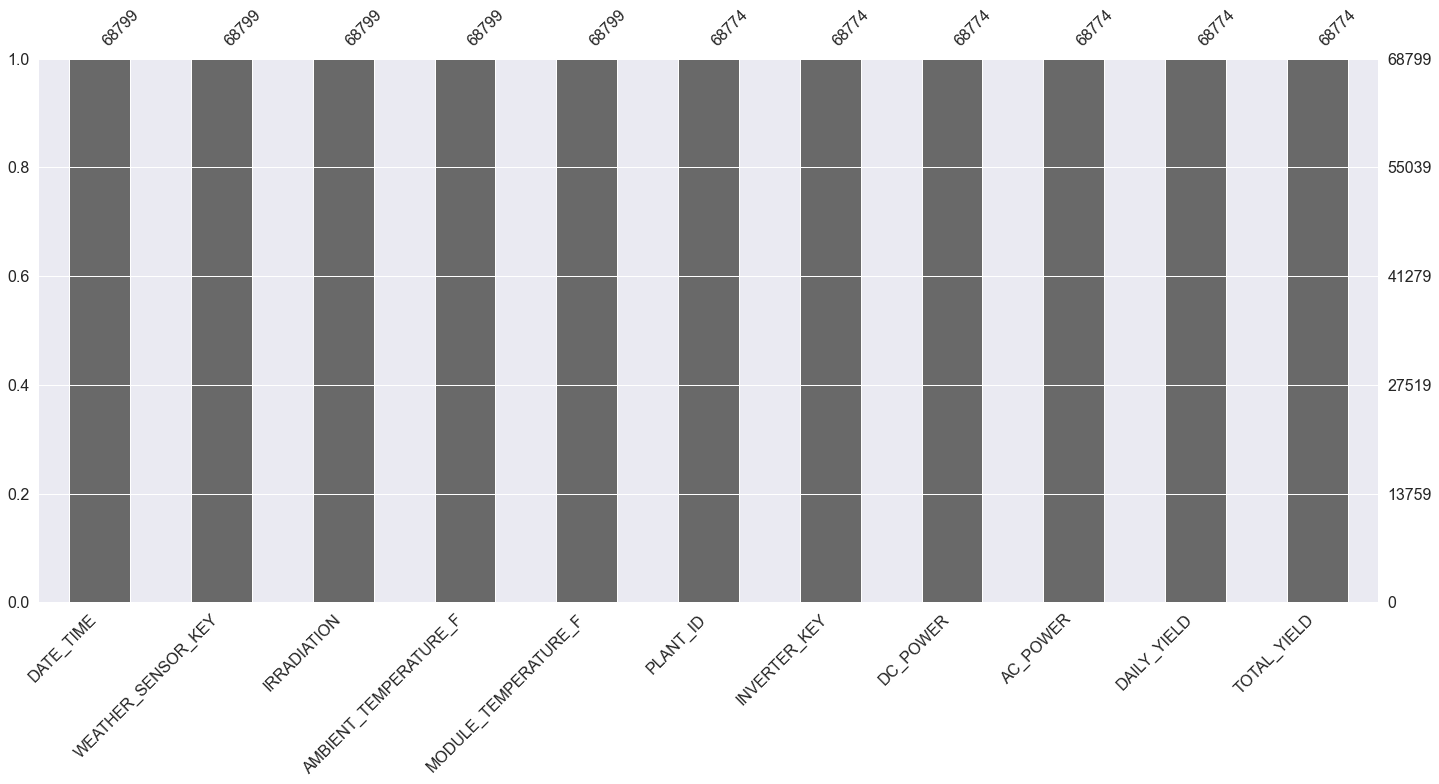

In [67]:
# generate preview of entries with null values for PLANT 1

if len(P1_PRE_CLEAN[P1_PRE_CLEAN.isnull().any(axis=1)] != 0): #is not equal to
    #print(P1_PRE_CLEAN[P1_PRE_CLEAN.isnull().any(axis=1)].head(40))
    
# Visualize missing values (NaN) values using Missingno Library    
    msno.bar(P1_PRE_CLEAN)
    plt.show()

Inverter HmiyD2TTLFNqkNe at Plant 1 has 25 NAN values for PLANT_ID, INVERTER_KEY, DC_POWER  AC_POWER  DAILY_YIELD and TOTAL_YIELD

No missing values in plant 2 data

###### Handling missing and NA data

In [35]:
#Create copy of DataFrames

P1_CLEAN = P1_PRE_CLEAN.copy()
P2_CLEAN = P2_PRE_CLEAN.copy()


#Insert rows for missing DATE_TIME to be filled

#Copy of original dataframe shapes to validate row counts
OG_rowcounts = [df.shape[0] for df in [P1_CLEAN, P2_CLEAN]]

#Define function for DATE_TIME insertions
def INSERT_DATETIME(x):
    return x.reindex(pd.date_range(x.index.min(), x.index.max(), freq='15min', name='DATE_TIME')) 

#Re-indexes Pandas series to the DATE_TIME sequence with 15 minutes frequency. 
#Missing DATE_TIME value in the series index is inserted.

In [36]:
#[P1_CLEAN, P2_CLEAN]

# Apply DATE_TIME insertion function
P1_CLEAN = P1_CLEAN.set_index('DATE_TIME').groupby('INVERTER_KEY').apply(INSERT_DATETIME).drop('INVERTER_KEY', axis=1)
P1_CLEAN.reset_index(inplace=True)
P2_CLEAN = P2_CLEAN.set_index('DATE_TIME').groupby('INVERTER_KEY').apply(INSERT_DATETIME).drop('INVERTER_KEY', axis=1)
P2_CLEAN.reset_index(inplace=True)

#Inspect for matching quantity of rows. 
print(Counter(P1_CLEAN.INVERTER_KEY), "\n")
print(Counter(P2_CLEAN.INVERTER_KEY), "\n")

print(Counter(P1_CLEAN.WEATHER_SENSOR_KEY), "\n")
print(Counter(P2_CLEAN.WEATHER_SENSOR_KEY), "\n")

Counter({'1BY6WEcLGh8j5v7': 3264, '1IF53ai7Xc0U56Y': 3264, '3PZuoBAID5Wc2HD': 3264, '7JYdWkrLSPkdwr4': 3264, 'McdE0feGgRqW7Ca': 3264, 'VHMLBKoKgIrUVDU': 3264, 'WRmjgnKYAwPKWDb': 3264, 'ZnxXDlPa8U1GXgE': 3264, 'ZoEaEvLYb1n2sOq': 3264, 'adLQvlD726eNBSB': 3264, 'bvBOhCH3iADSZry': 3264, 'iCRJl6heRkivqQ3': 3264, 'ih0vzX44oOqAx2f': 3264, 'pkci93gMrogZuBj': 3264, 'rGa61gmuvPhdLxV': 3264, 'sjndEbLyjtCKgGv': 3264, 'uHbuxQJl8lW7ozc': 3264, 'wCURE6d3bPkepu2': 3264, 'z9Y9gH1T5YWrNuG': 3264, 'zBIq5rxdHJRwDNY': 3264, 'zVJPv84UY57bAof': 3264, 'YxYtjZvoooNbGkE': 3260}) 

Counter({'4UPUqMRk7TRMgml': 3264, '81aHJ1q11NBPMrL': 3264, '9kRcWv60rDACzjR': 3264, 'Et9kgGMDl729KT4': 3264, 'IQ2d7wF4YD8zU1Q': 3264, 'LYwnQax7tkwH5Cb': 3264, 'LlT2YUhhzqhg5Sw': 3264, 'Mx2yZCDsyf6DPfv': 3264, 'NgDl19wMapZy17u': 3264, 'PeE6FRyGXUgsRhN': 3264, 'Qf4GUc1pJu5T6c6': 3264, 'Quc1TzYxW2pYoWX': 3264, 'V94E5Ben1TlhnDV': 3264, 'WcxssY2VbP4hApt': 3264, 'mqwcsP2rE7J0TFp': 3264, 'oZ35aAeoifZaQzV': 3264, 'oZZkBaNadn6DNKz': 3264, 'q49

In [37]:
print(P1_CLEAN.shape)
print(P2_CLEAN.shape)

(71804, 11)
(71808, 11)


In [38]:
# check dfs for nulls and inspect the data
print(P1_CLEAN.isna().sum(), "\n")
print("*"*80, "\n")
print(P2_CLEAN.isna().sum(), "\n")

INVERTER_KEY                0
DATE_TIME                   0
WEATHER_SENSOR_KEY       3030
IRRADIATION              3030
AMBIENT_TEMPERATURE_F    3030
MODULE_TEMPERATURE_F     3030
PLANT_ID                 3030
DC_POWER                 3030
AC_POWER                 3030
DAILY_YIELD              3030
TOTAL_YIELD              3030
dtype: int64 

******************************************************************************** 

INVERTER_KEY                0
DATE_TIME                   0
WEATHER_SENSOR_KEY       4110
IRRADIATION              4110
AMBIENT_TEMPERATURE_F    4110
MODULE_TEMPERATURE_F     4110
PLANT_ID                 4110
DC_POWER                 4110
AC_POWER                 4110
DAILY_YIELD              4110
TOTAL_YIELD              4110
dtype: int64 



In [39]:
print(P1_PRE_CLEAN.shape) # prior to inserting rows
print(P1_CLEAN.shape)
print("*"*80, "\n")
print(P2_PRE_CLEAN.shape) # prior to inserting rows
print(P2_CLEAN.shape)

(68799, 11)
(71804, 11)
******************************************************************************** 

(67698, 11)
(71808, 11)


###### Preview Missing Values

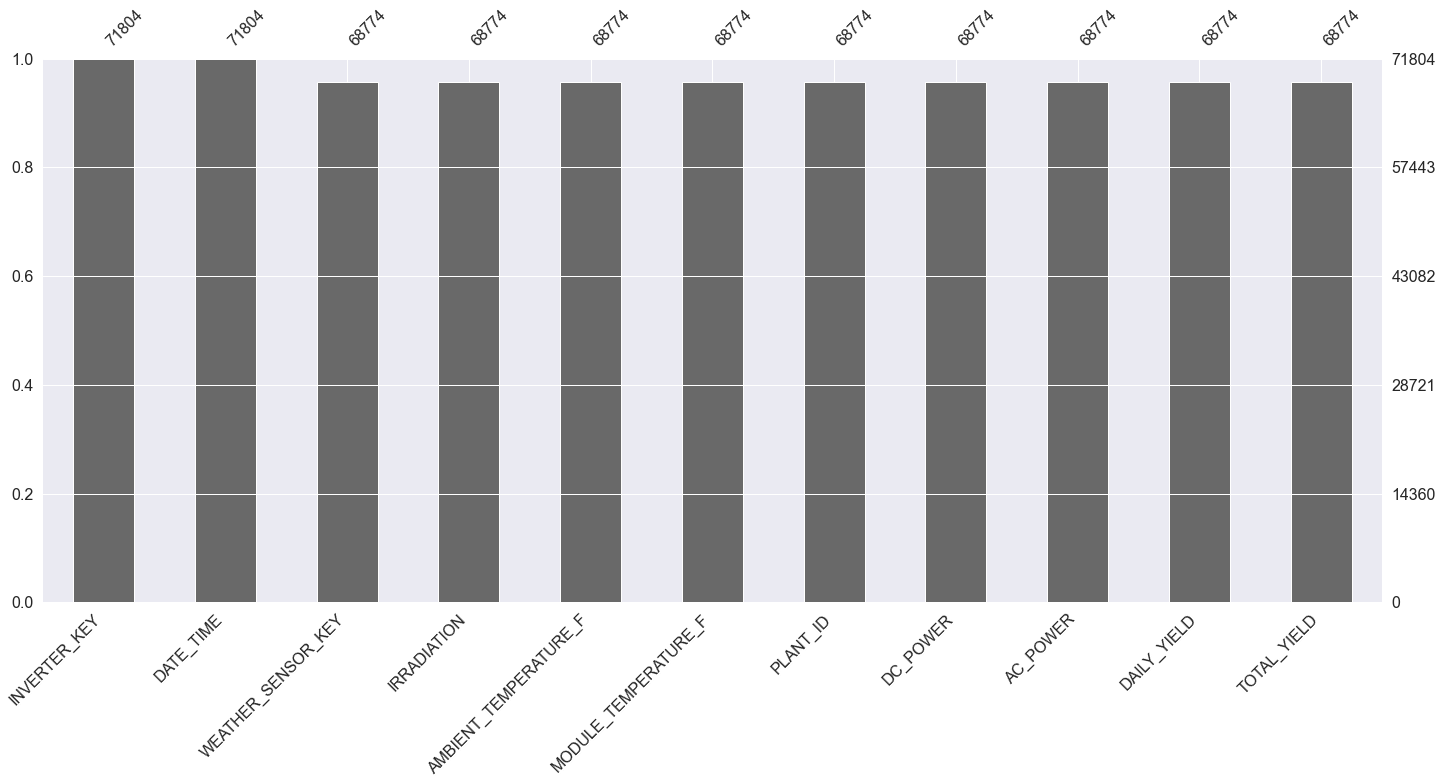

In [40]:
# generate preview of Missing Values for PLANT 1 with Missingno

#Plant 1
if len(P1_CLEAN[P1_CLEAN.isnull().any(axis=1)] != 0): #is not equal to
    #print(P1_CLEAN[P1_CLEAN.isnull().any(axis=1)].head(10))
    
#Visualize missing values (NaN) values using Missingno Library    
    msno.bar(P1_CLEAN)
    plt.show()

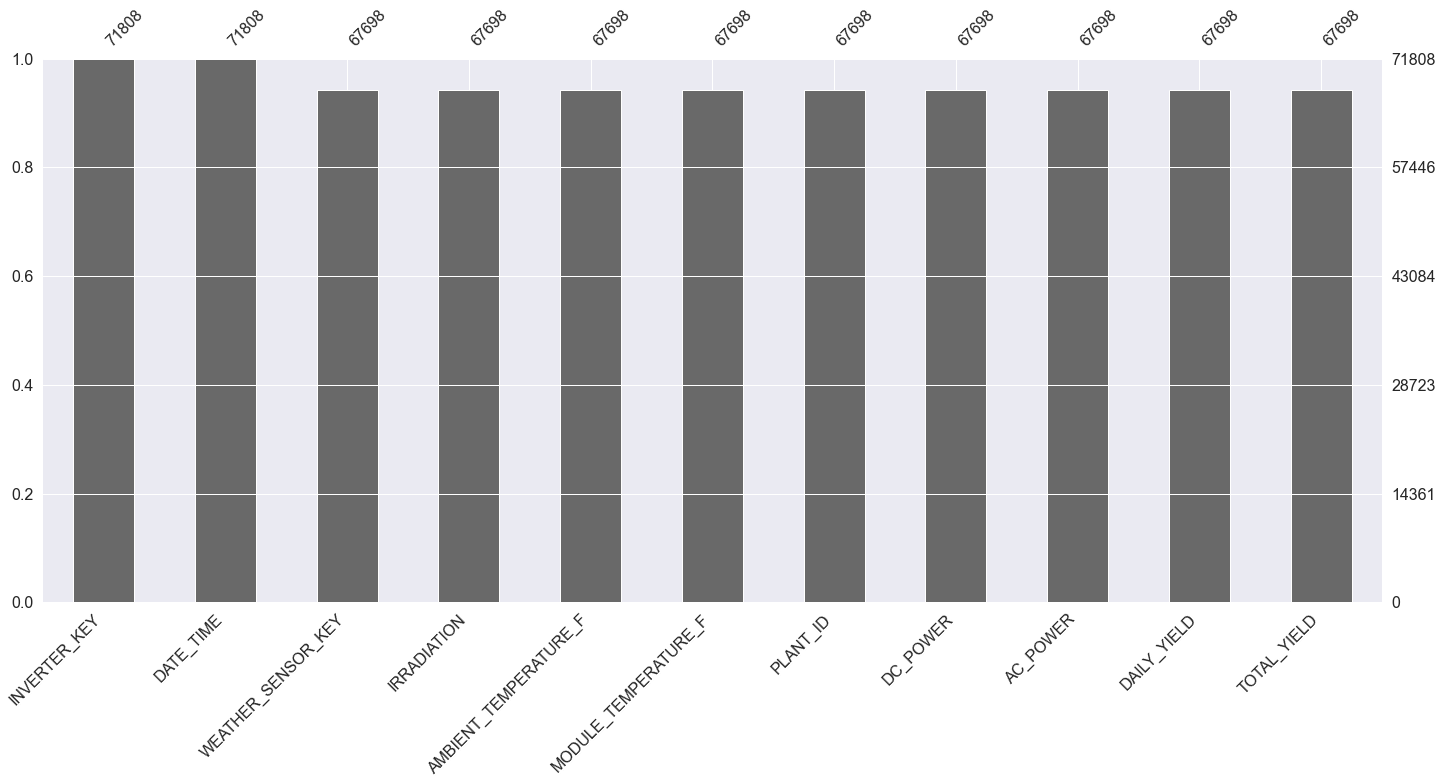

In [41]:
# generate preview of Missing Values for PLANT 2 with Missingno

#Plant 1
if len(P2_CLEAN[P2_CLEAN.isnull().any(axis=1)] != 0): #is not equal to
    #print(P2_CLEAN[P2_CLEAN.isnull().any(axis=1)].head(10))
    
#Visualize missing values (NaN) values using Missingno Library    
    msno.bar(P2_CLEAN)
    plt.show()

###### Feature engeneering

In [42]:
# Separation of DATE_TIME to date and time as additional time features used as a helper

for df in [P1_CLEAN, P2_CLEAN]:
    df['DATE'] = df['DATE_TIME'].dt.date
    df['TIME'] = df['DATE_TIME'].dt.time
    df['HOUR'] = df['DATE_TIME'].dt.hour
    df['DAY'] = df['DATE_TIME'].dt.day
    df['WEEKDAY'] = df['DATE_TIME'].dt.day_name()
    df['MONTH'] = df['DATE_TIME'].dt.month
    df['YEAR'] = df['DATE_TIME'].dt.year


In [43]:
for df in [P1_CLEAN, P2_CLEAN]:
    df['DATE'] = pd.to_datetime(df['DATE'])
    #df['DATE'] = df['DATE'].dt.strftime('%m/%d/%Y')

# Validate Dtype changes
    print(df.DATE.head(), "\n")

0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE, dtype: datetime64[ns] 

0   2020-05-15
1   2020-05-15
2   2020-05-15
3   2020-05-15
4   2020-05-15
Name: DATE, dtype: datetime64[ns] 



###### Overview of DC POWER

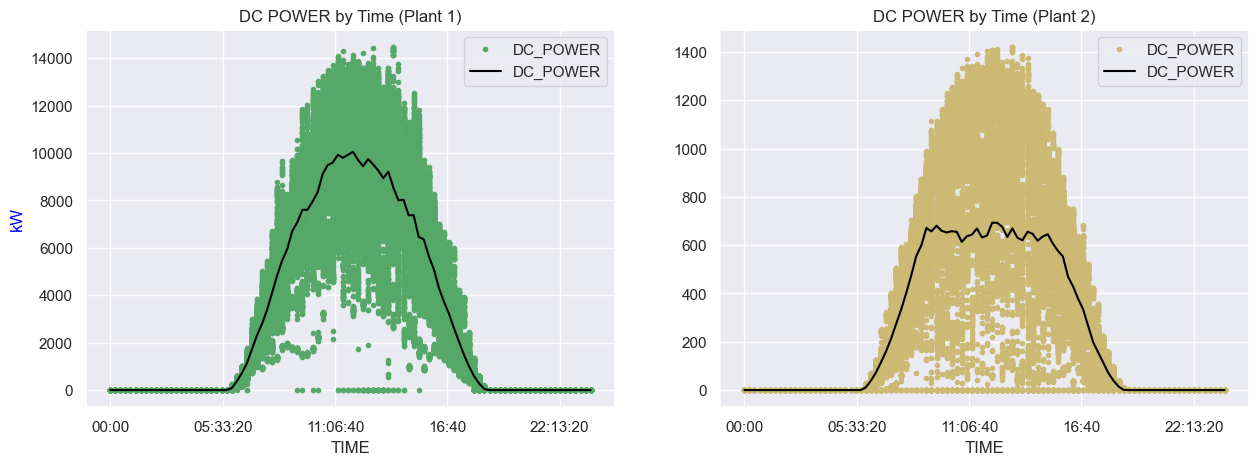

In [44]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
P1_CLEAN.plot(x= 'TIME', y='DC_POWER', style='g.', figsize=(15,5),ax=ax[0])
P1_CLEAN.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
P2_CLEAN.plot(x= 'TIME', y='DC_POWER', style='y.', figsize=(15,5),ax=ax[1])
P2_CLEAN.groupby('TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

Due to dunlight, Between 5:33 and 18:00, the Plant generates DC Power, otherwise it is at zero. 

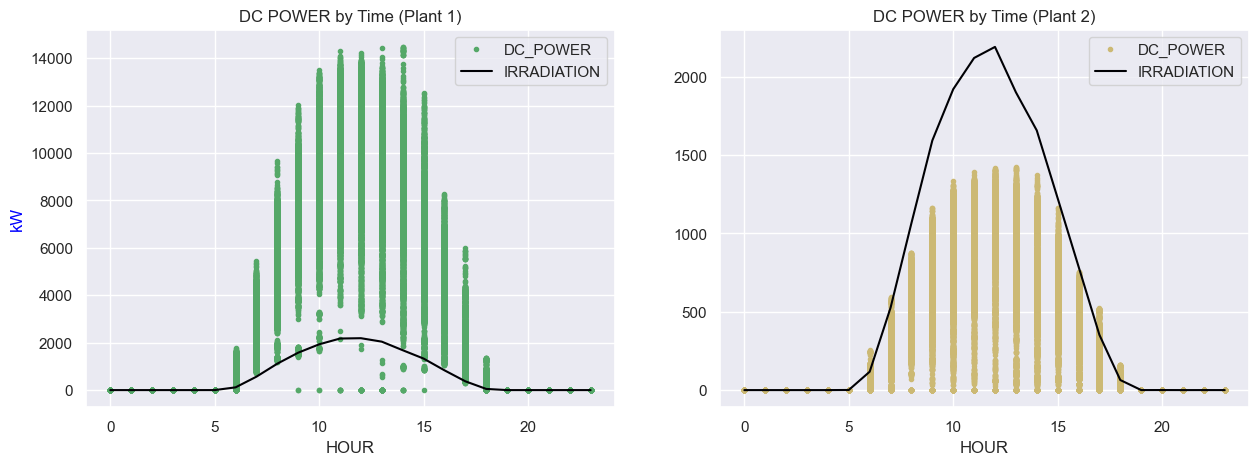

In [45]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
P1_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='g.', figsize=(15,5),ax=ax[0])
P1_CLEAN.groupby('HOUR')['IRRADIATION'].agg('sum').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
P2_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='y.', figsize=(15,5),ax=ax[1])
P2_CLEAN.groupby('HOUR')['IRRADIATION'].agg('sum').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

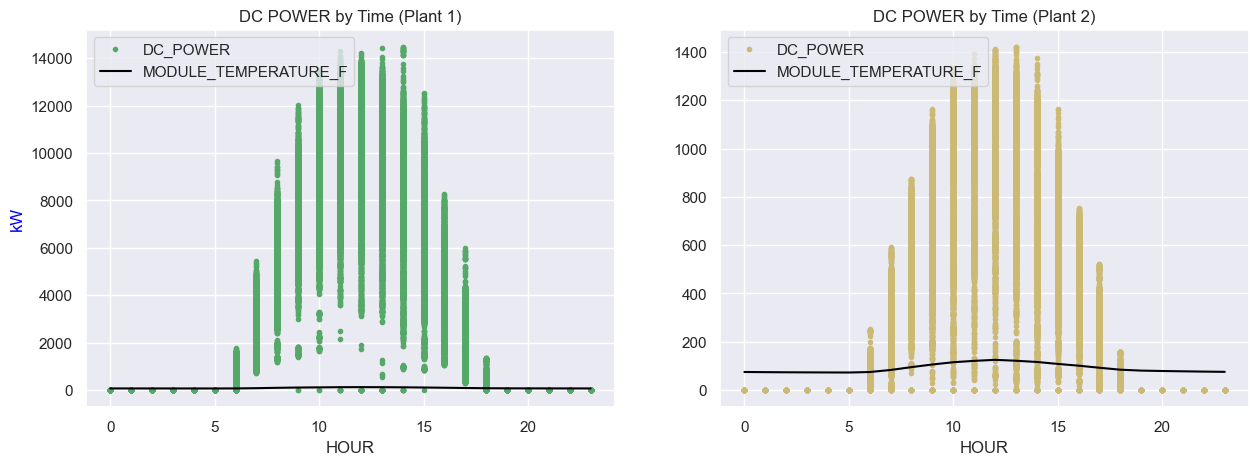

In [46]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
P1_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='g.', figsize=(15,5),ax=ax[0])
P1_CLEAN.groupby('HOUR')['MODULE_TEMPERATURE_F'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
P2_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='y.', figsize=(15,5),ax=ax[1])
P2_CLEAN.groupby('HOUR')['MODULE_TEMPERATURE_F'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

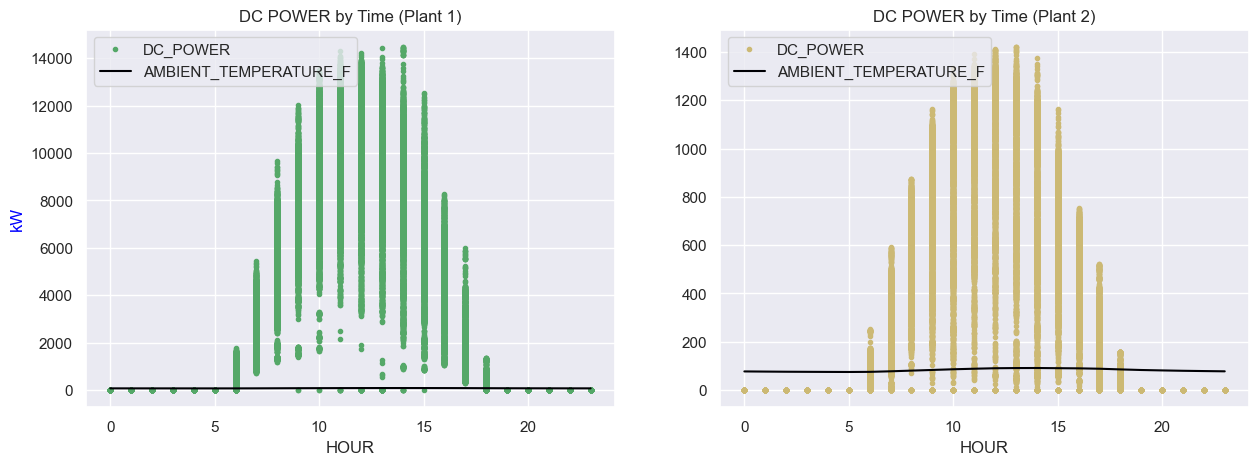

In [47]:
#Yield by time to identify features with outliers that should be negated. 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

#Power Plant 1 DC POWER by 
P1_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='g.', figsize=(15,5),ax=ax[0])
P1_CLEAN.groupby('HOUR')['AMBIENT_TEMPERATURE_F'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[0])

#Power Plant 2 DC POWER by Hour
P2_CLEAN.plot(x= 'HOUR', y='DC_POWER', style='y.', figsize=(15,5),ax=ax[1])
P2_CLEAN.groupby('HOUR')['AMBIENT_TEMPERATURE_F'].agg('mean').plot(legend=True, colormap='inferno',ax=ax[1])

ax[0].set_title('DC POWER by Time (Plant 1)')
ax[1].set_title('DC POWER by Time (Plant 2)')
ax[0].set_ylabel('kW',color='blue',fontsize=12)
plt.show()

In [48]:
# Inverter level analysis

In [49]:
P1_INVETER = P1_CLEAN.copy()
P2_INVETER = P2_CLEAN.copy()

for df in [P1_INVETER, P2_INVETER]:

# create dummy feature DC_POWER >= 0.01 -> 0,  DC_POWER < 0.01 -> 1
    df.loc[(df['DC_POWER'] >= 0.01), 'DC_ZERO_POWER'] = 0
    df.loc[(df['DC_POWER'] < 0.01), 'DC_ZERO_POWER'] = 1

In [50]:
P1_CHART_DC_D = P1_INVETER.groupby(['DATE','INVERTER_KEY'])['DC_POWER'].sum().unstack()
P1_CHART_TY_D = P1_INVETER.groupby(['DATE','INVERTER_KEY'])['DAILY_YIELD'].sum().unstack()

P2_CHART_DC_D = P2_INVETER.groupby(['DATE','INVERTER_KEY'])['DC_POWER'].sum().unstack()
P2_CHART_TY_D = P2_INVETER.groupby(['DATE','INVERTER_KEY'])['DAILY_YIELD'].sum().unstack()

P1_CHART_ZERO_D = P1_INVETER.groupby(['DATE','INVERTER_KEY'])['DC_ZERO_POWER'].sum().unstack()
P2_CHART_ZERO_D = P2_INVETER.groupby(['DATE','INVERTER_KEY'])['DC_ZERO_POWER'].sum().unstack()


P1_CHART_DC_T = P1_INVETER.groupby(['TIME','INVERTER_KEY'])['DC_POWER'].sum().unstack()
P1_CHART_TY_T = P1_INVETER.groupby(['TIME','INVERTER_KEY'])['DAILY_YIELD'].sum().unstack()

P2_CHART_DC_T = P2_INVETER.groupby(['TIME','INVERTER_KEY'])['DC_POWER'].sum().unstack()
P2_CHART_TY_T = P2_INVETER.groupby(['TIME','INVERTER_KEY'])['DAILY_YIELD'].sum().unstack()

P1_CHART_ZERO_T = P1_INVETER.groupby(['TIME','INVERTER_KEY'])['DC_ZERO_POWER'].sum().unstack()
P2_CHART_ZERO_T = P2_INVETER.groupby(['TIME','INVERTER_KEY'])['DC_ZERO_POWER'].sum().unstack()


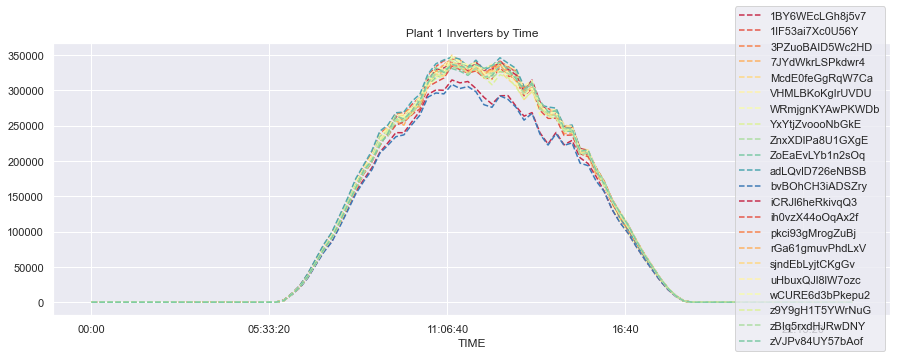

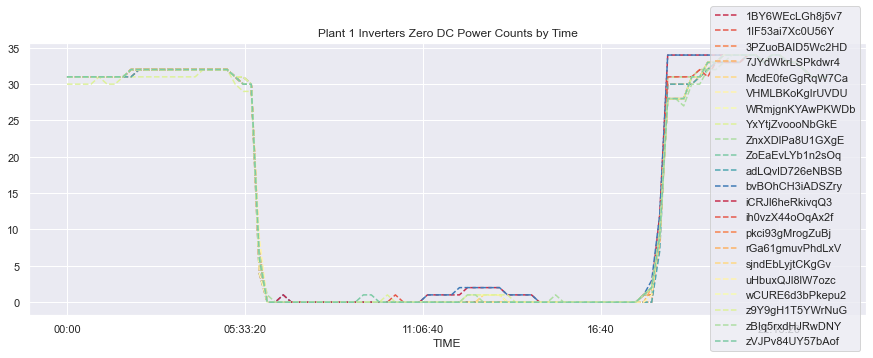

In [51]:
#By Time

# Inverter - Plant 1
cmap = sns.color_palette("Spectral",  n_colors=12)

P1_CHART_DC_T.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 1 Inverters by Time')
plt.legend(loc='right')
plt.show()



# Inverter - Plant 1  for Zero DC Power Counts
cmap = sns.color_palette("Spectral",  n_colors=12)

P1_CHART_ZERO_T.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 1 Inverters Zero DC Power Counts by Time')
plt.legend(loc='right')
plt.show()

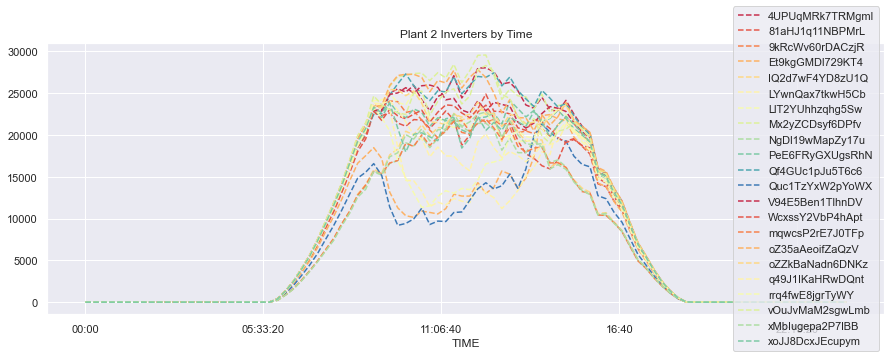

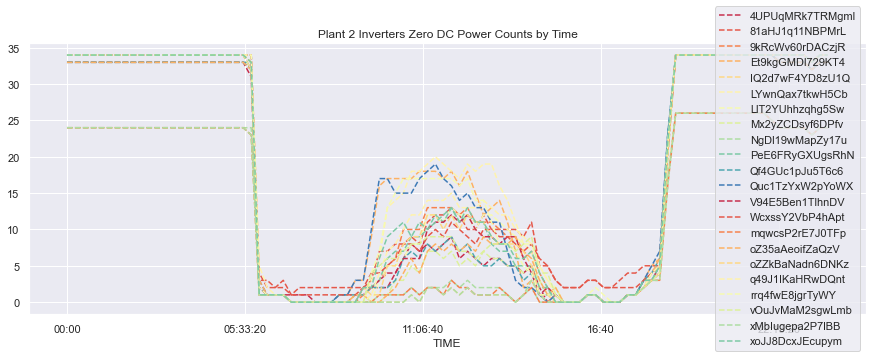

In [52]:
#By Time

# Inverter - Plant 2
cmap = sns.color_palette("Spectral",  n_colors=12)

P2_CHART_DC_T.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 2 Inverters by Time')
plt.legend(loc='right')
plt.show()



# Inverter - Plant 2  for Zero DC Power Counts
cmap = sns.color_palette("Spectral",  n_colors=12)

P2_CHART_ZERO_T.plot(color=cmap, linestyle = 'dashed', figsize=(15,5))

plt.title('Plant 2 Inverters Zero DC Power Counts by Time')
plt.legend(loc='right')
plt.show()

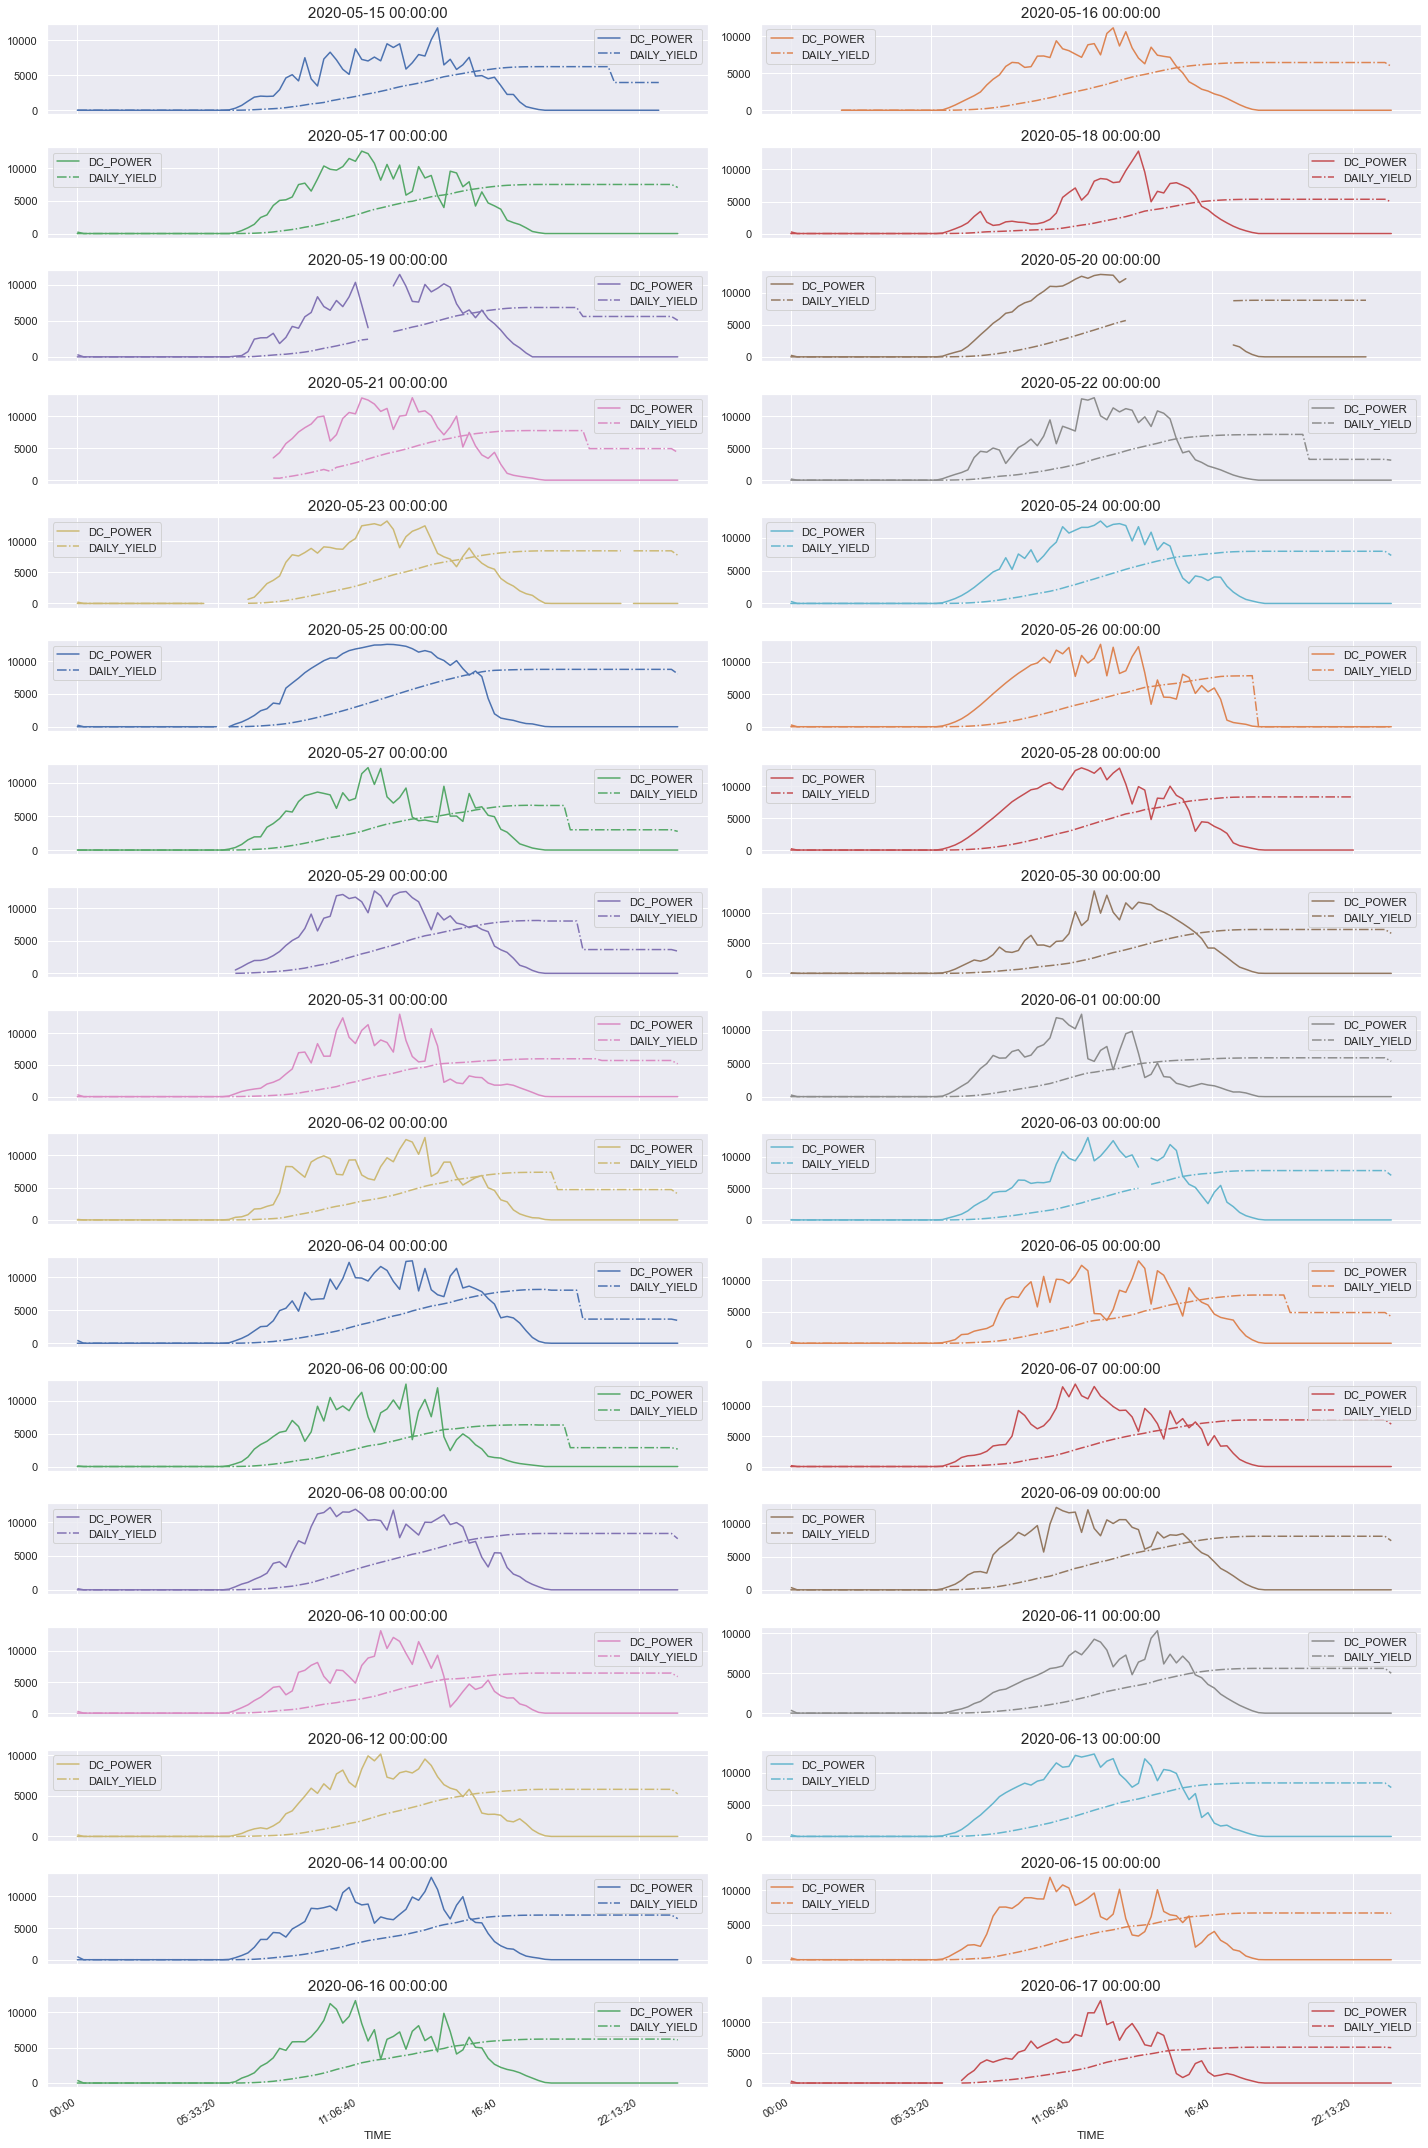

In [53]:
# just for columns
cols=P1_INVETER.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()

ax =P1_INVETER.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
P1_INVETER.groupby(['TIME','DATE'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

Issues with Plant 1: Between 2020-05-19 and 2020-05-21 there is a  period which has null values in daily yield and dc power generation. 

This may be due to a sensor isssues at the plant or faulty inverters. I will more closely at this issue by lookign at weather data for comparison.

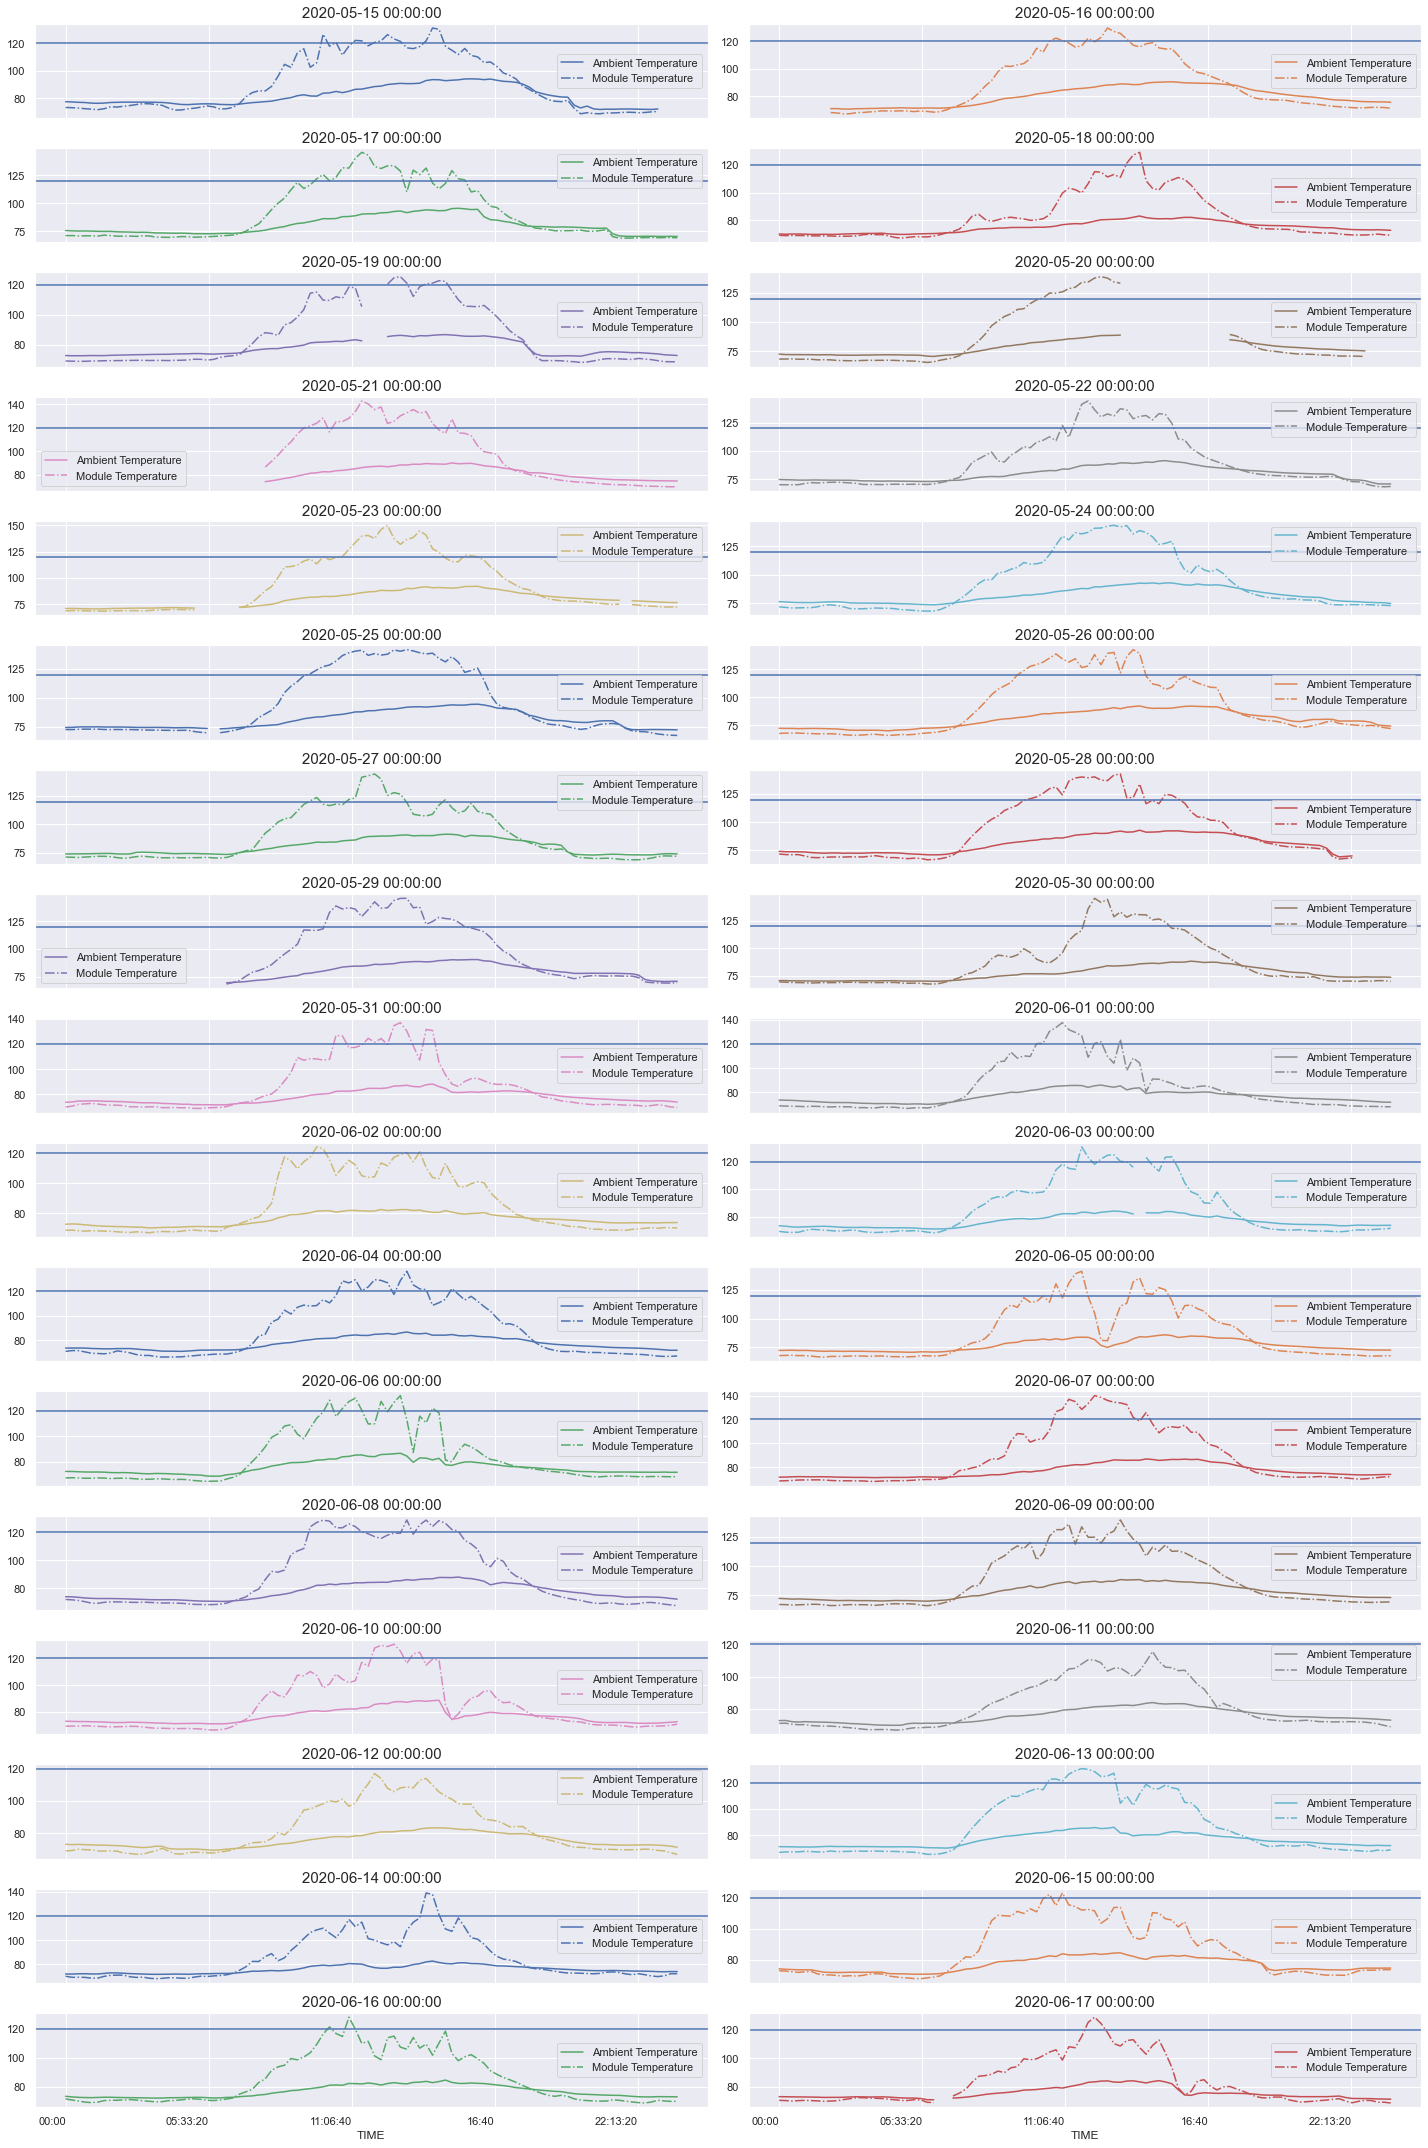

In [54]:
ax= P1_INVETER.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE_F'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
P1_INVETER.groupby(['TIME','DATE'])['MODULE_TEMPERATURE_F'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(120)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Ambient Temperature','Module Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

During these periods the plant does not appear to work. 

I assume there was a technical issue at plant 1.

I included a line to see when module temperature goes above 120 degrees, since a module overload may cause inverter failure. When we see a drastic drop in DC Power during peak sunlight hours followed by null values, we can assume inverter fault and potential need for repair or replacement.

In [55]:
# Plant 2

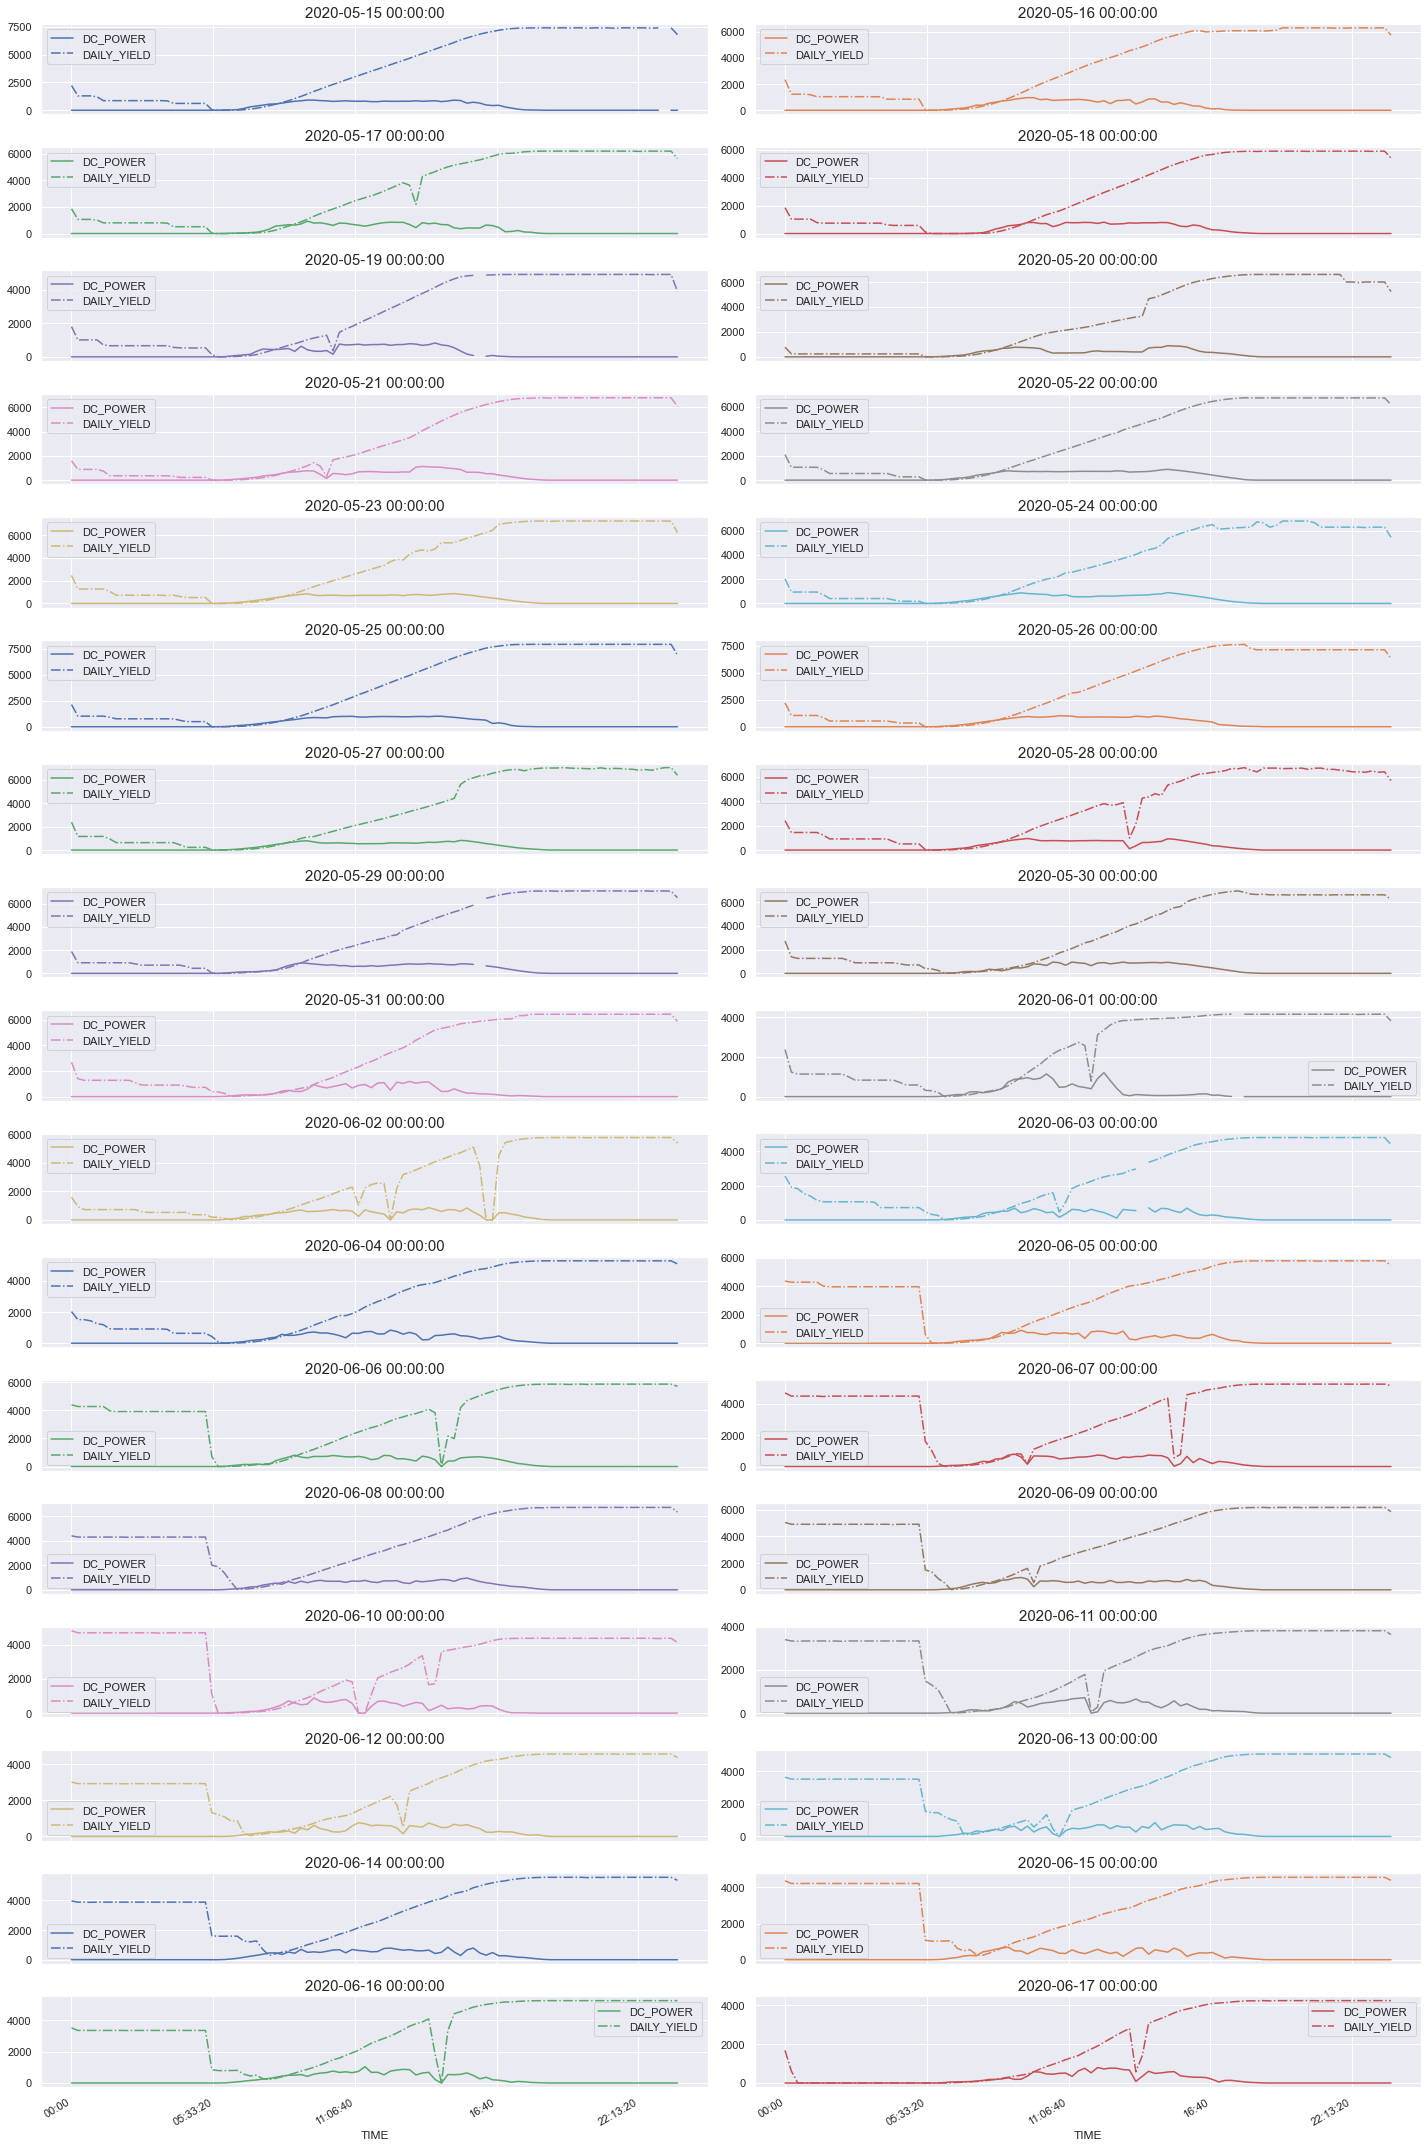

In [56]:
# just for columns
cols=P2_INVETER.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()

ax =P2_INVETER.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
P2_INVETER.groupby(['TIME','DATE'])['DAILY_YIELD'].mean().unstack().plot(sharex=True,subplots=True,layout=(17,2),figsize=(20,20),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

Issues with Plant 2: Between 2020-06-05 and 2020-06-16 

there is a period in which daily yield is far gereater than dc power generation prior to 6:00 am, this is when daylight hours start, on average. Daily Yield Prior to 6:00, especially when DC Power is at 0 makes no sense. This portion of the data will need to be looked at more closely. 

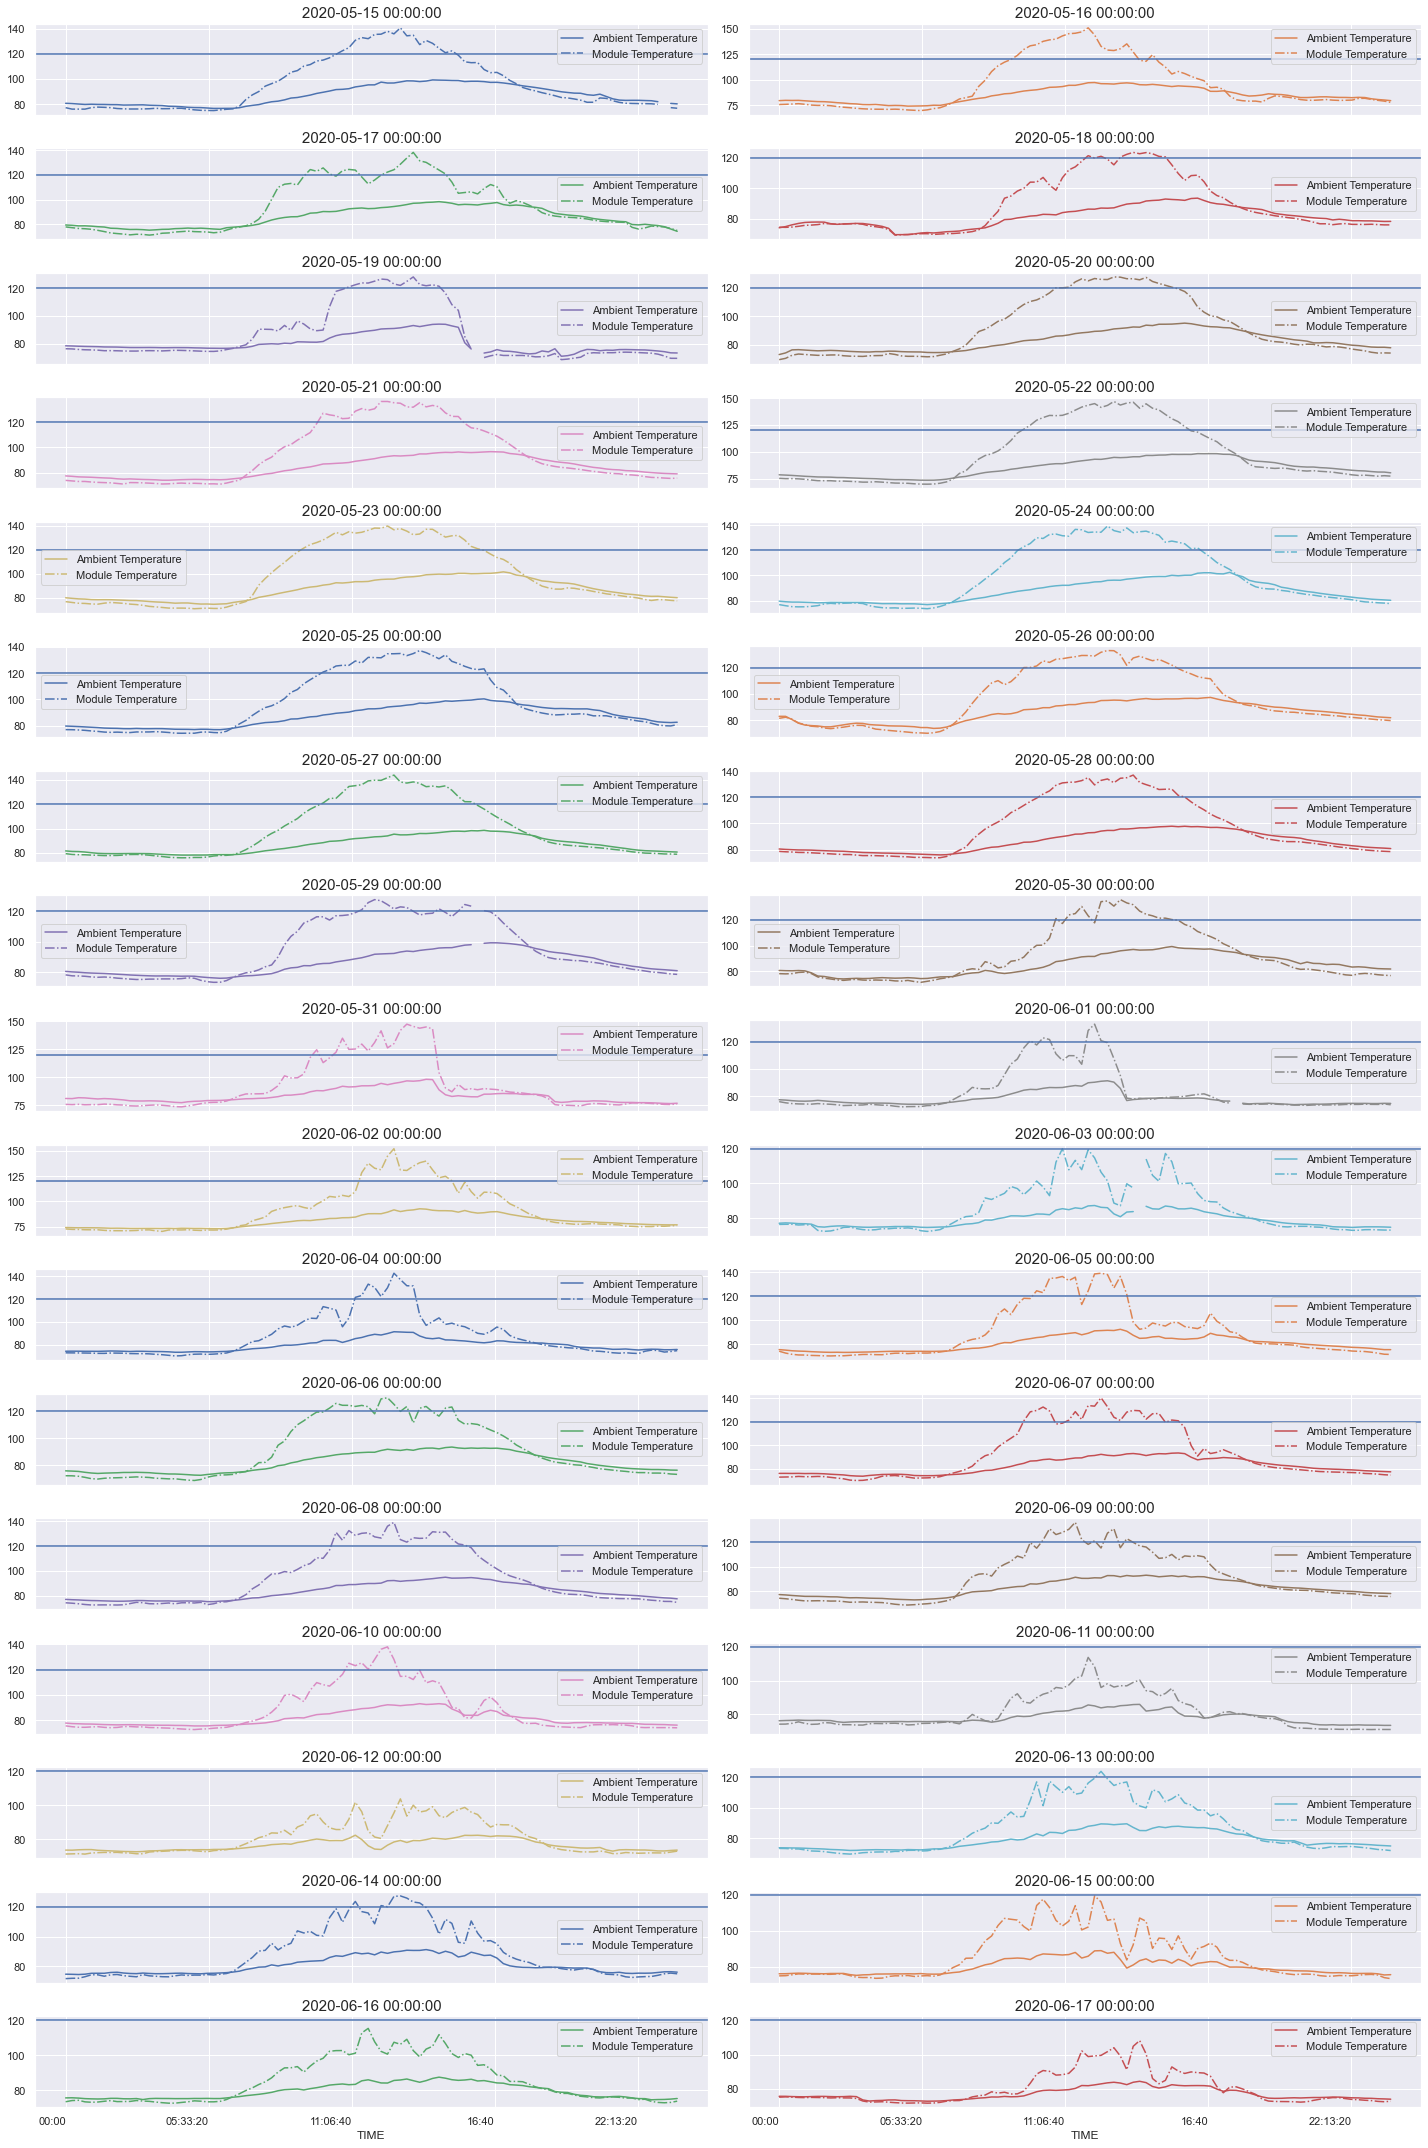

In [57]:
ax= P2_INVETER.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE_F'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,30))
P2_INVETER.groupby(['TIME','DATE'])['MODULE_TEMPERATURE_F'].mean().unstack().plot(subplots=True,layout=(17,2),figsize=(20,40),style='-.',ax=ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(120)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Ambient Temperature','Module Temperature'])
        i=i+1

plt.tight_layout()
plt.show()

###### Reaplace Missing Values

In [58]:
# Establish sunrise/sunset timeframes prior to filling in null values.

P1_CLEAN_DAYTIME = P1_CLEAN[P1_CLEAN['IRRADIATION']>= 0.01].groupby('DATE_TIME')['INVERTER_KEY'].count().reset_index()
P1_CLEAN_DAYTIME['DATE_TIME'] = P1_CLEAN_DAYTIME['DATE_TIME'].dt.time

P2_CLEAN_DAYTIME = P2_CLEAN[P2_CLEAN['IRRADIATION']>= 0.01].groupby('DATE_TIME')['INVERTER_KEY'].count().reset_index()
P2_CLEAN_DAYTIME['DATE_TIME'] = P2_CLEAN_DAYTIME['DATE_TIME'].dt.time

print("Plant 1 Daytime Hours \n", P2_CLEAN_DAYTIME.groupby('DATE_TIME')['INVERTER_KEY'].count(), "\n")
print("Plant 2 Daytime Hours \n", P2_CLEAN_DAYTIME.groupby('DATE_TIME')['INVERTER_KEY'].count(), "\n")


Plant 1 Daytime Hours 
 DATE_TIME
06:00:00    19
06:15:00    32
06:30:00    33
06:45:00    33
07:00:00    33
07:15:00    34
07:30:00    34
07:45:00    34
08:00:00    34
08:15:00    34
08:30:00    34
08:45:00    34
09:00:00    34
09:15:00    34
09:30:00    34
09:45:00    34
10:00:00    34
10:15:00    34
10:30:00    34
10:45:00    34
11:00:00    34
11:15:00    34
11:30:00    34
11:45:00    34
12:00:00    34
12:15:00    34
12:30:00    34
12:45:00    34
13:00:00    34
13:15:00    34
13:30:00    34
13:45:00    34
14:00:00    33
14:15:00    34
14:30:00    34
14:45:00    34
15:00:00    34
15:15:00    34
15:30:00    34
15:45:00    34
16:00:00    32
16:15:00    34
16:30:00    34
16:45:00    34
17:00:00    34
17:15:00    33
17:30:00    30
17:45:00    30
18:00:00    29
18:15:00    28
18:30:00    19
Name: INVERTER_KEY, dtype: int64 

Plant 2 Daytime Hours 
 DATE_TIME
06:00:00    19
06:15:00    32
06:30:00    33
06:45:00    33
07:00:00    33
07:15:00    34
07:30:00    34
07:45:00    34
08:00:00    

Irradiation is >= 0.01 between 6:00am and 6:30pm for both plants. Since Solar DC Power Generation is dependent upon Irradiation, this is a good indicator of daytime vs nighttime hours. Null values for features other than module and ambient temperatures will be set to zero outside of daylight hours.

Missing daily yield values after 6:30 pm for both plants with be imput with the last non-null value for same day.

Lastly, I will interpolate any other other missing values. Linear interpolation works with these dataframes since they are time series data based and have linear trends during a given day. This should fill in the remaining missing values.

###### Filling Null Values

In [59]:
P1_NO_NULL = P1_CLEAN.copy()
P2_NO_NULL = P2_CLEAN.copy()

# First, missing values outside the hours of sunlight with 0 (Exclude Temperatures)
# DAILY_YIELD is cumulative, filled only prior to sun rise
for df in [P1_NO_NULL, P2_NO_NULL]:
    df.loc[(df['DC_POWER'].isna()) & ((df['HOUR'] < 6) | (df['HOUR'] > 18.5)), 'DC_POWER'] = 0
    df.loc[(df['AC_POWER'].isna()) & ((df['HOUR'] < 6) | (df['HOUR'] > 18.5)), 'AC_POWER'] = 0
    df.loc[(df['IRRADIATION'].isna()) & (df['HOUR'] < 6), 'DAILY_YIELD'] = 0
    df.loc[(df['IRRADIATION'].isna()) & ((df['HOUR'] < 6) | (df['HOUR'] > 18.5)), 'IRRADIATION'] = 0

# DAILY_YIELD after sunset is filled with last non-null value prior to null day
for df in [P1_NO_NULL, P2_NO_NULL]:
    FILL_VALUE = df[~df['DAILY_YIELD'].isna()].groupby(["INVERTER_KEY", "DATE"])["DAILY_YIELD"].last().reset_index()
    FILL_VALUE.rename(columns={"DAILY_YIELD": "DAILY_YIELD_FILL_VALUE_NIGHT"}, inplace=True)
    df = pd.merge(df, FILL_VALUE, how='left', on=['INVERTER_KEY', 'DATE'])
    df.loc[(df['DAILY_YIELD'].isna()) & (df['HOUR'] > 18.5), 'DAILY_YIELD'] = df.loc[(df['DAILY_YIELD'].isna()) & (df['HOUR'] > 18.5), 'DAILY_YIELD_FILL_VALUE_NIGHT']
    df.drop("DAILY_YIELD_FILL_VALUE_NIGHT", axis=1, inplace=True)

# Interpolate linearly other missing values while ignoring TOTAL_YIELD since it is = previous TOTAL_YIELD + DAILY_YIELD
for df in [P1_NO_NULL, P2_NO_NULL]:
    df['DC_POWER'].interpolate(method='linear', axis=0, inplace=True)
    df['AC_POWER'].interpolate(method='linear', axis=0, inplace=True)
    df['DAILY_YIELD'].interpolate(method='linear', axis=0, inplace=True)
    df['MODULE_TEMPERATURE_F'].interpolate(method='linear', axis=0, inplace=True)
    df['AMBIENT_TEMPERATURE_F'].interpolate(method='linear', axis=0, inplace=True)
    df['IRRADIATION'].interpolate(method='linear', axis=0, inplace=True)
    

# fill missing TOTAL_YIELD by getting the most recent non-null value and adding the current DAILY_YIELD
for df in [P1_NO_NULL, P2_NO_NULL]:
    NON_NULL_TY = df[~df['TOTAL_YIELD'].isna()].groupby(["INVERTER_KEY", "DATE"])["TOTAL_YIELD"].last().reset_index()
    DY_KEY = df.groupby(["INVERTER_KEY", "DATE"])["DAILY_YIELD"].last().reset_index()
    FILL_VALUE = pd.merge(NON_NULL_TY, DY_KEY, how='left', on=['INVERTER_KEY', 'DATE'])
    FILL_VALUE['TOTAL_YIELD_FILL_VALUE'] = FILL_VALUE['TOTAL_YIELD'] + FILL_VALUE['DAILY_YIELD']
    df = pd.merge(df, FILL_VALUE.drop(['TOTAL_YIELD', 'DAILY_YIELD'], axis=1), how='left', on=['INVERTER_KEY', 'DATE'])
    df['TOTAL_YIELD'].fillna(df['TOTAL_YIELD_FILL_VALUE'], inplace=True)
    df.drop('TOTAL_YIELD_FILL_VALUE', axis=1, inplace=True)
    

# If missing TOTAL_YIELD vlaues remain, fill with last non-null value prior to null time
# Next, fill missing PLANT_ID with last non-null value prior to null ID
# Next, fill missing WEATHER_SENSOR_KEY with last non-null value prior to null Key
for df in [P1_NO_NULL, P2_NO_NULL]:
    df.sort_values(['INVERTER_KEY', 'DATE_TIME'], ascending=True, inplace=True)
    df['TOTAL_YIELD'].fillna(method='ffill', inplace=True)
    df['PLANT_ID'].fillna(method='ffill', inplace=True)
    df['WEATHER_SENSOR_KEY'].fillna(method='ffill', inplace=True)
        

# inspect missing values
for df in [P1_NO_NULL, P2_NO_NULL]:
    print(df.isna().sum(), "\n")
    print(df.isnull().sum(), "\n")

INVERTER_KEY             0
DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
PLANT_ID                 0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
DATE                     0
TIME                     0
HOUR                     0
DAY                      0
WEEKDAY                  0
MONTH                    0
YEAR                     0
dtype: int64 

INVERTER_KEY             0
DATE_TIME                0
WEATHER_SENSOR_KEY       0
IRRADIATION              0
AMBIENT_TEMPERATURE_F    0
MODULE_TEMPERATURE_F     0
PLANT_ID                 0
DC_POWER                 0
AC_POWER                 0
DAILY_YIELD              0
TOTAL_YIELD              0
DATE                     0
TIME                     0
HOUR                     0
DAY                      0
WEEKDAY                  0
MONTH                    0
YEAR                     0
dtype: int64 

###### Feature engeneering

In [60]:
for df in [P1_NO_NULL, P2_NO_NULL]:

# create dummy feature DC_POWER >= 0.01 -> 0,  DC_POWER < 0.01 -> 1
    df.loc[(df['DC_POWER'] >= 0.01), 'DC_ZERO_POWER'] = 0
    df.loc[(df['DC_POWER'] < 0.01), 'DC_ZERO_POWER'] = 1
    
# create dummy feature IRRADIATION >= 0.01 -> 0,  IRRADIATION < 0.01 -> 1
    df.loc[(df['IRRADIATION'] >= 0.01), 'ZERO_IRRADIATION'] = 0
    df.loc[(df['IRRADIATION'] < 0.01), 'ZERO_IRRADIATION'] = 1
    
    
# create dummy feature for daylight  ---- HOUR >= 6 & <= 18.5  -> 0,  HOUR < 6 OR HOUR > 18.5 -> 1 

    df.loc[(df['HOUR'] >= 6) & (df['HOUR'] <= 18.5), 'ZERO_DAYLIGHT'] = 0
    

In [61]:
for df in [P1_NO_NULL, P2_NO_NULL]:
    print(df.DC_ZERO_POWER.value_counts(dropna=False))
    print(df.ZERO_IRRADIATION.value_counts(dropna=False))
    print(df.ZERO_DAYLIGHT.value_counts(dropna=False))

0.00000    37760
1.00000    34044
Name: DC_ZERO_POWER, dtype: int64
0.00000    36785
1.00000    35019
Name: ZERO_IRRADIATION, dtype: int64
0.00000    38896
nan        32908
Name: ZERO_DAYLIGHT, dtype: int64
1.00000    39227
0.00000    32581
Name: DC_ZERO_POWER, dtype: int64
1.00000    36466
0.00000    35342
Name: ZERO_IRRADIATION, dtype: int64
0.00000    38896
nan        32912
Name: ZERO_DAYLIGHT, dtype: int64


In [62]:
# Check null values - Non-Daylight Hours 

for df in [P1_NO_NULL, P2_NO_NULL]:
    print(df.ZERO_DAYLIGHT.isna().sum(), "\n") #use escape with newline to create line spacing

32908 

32912 



In [63]:
#Fill Null values for ZERO_DAYLIGHT dummy

for df in [P1_NO_NULL, P2_NO_NULL]:
    df.ZERO_DAYLIGHT.fillna(1, inplace = True)

In [64]:
for df in [P1_NO_NULL, P2_NO_NULL]:
    print(df.ZERO_DAYLIGHT.value_counts(dropna=False))
    print(df.ZERO_IRRADIATION.value_counts(dropna=False))

0.00000    38896
1.00000    32908
Name: ZERO_DAYLIGHT, dtype: int64
0.00000    36785
1.00000    35019
Name: ZERO_IRRADIATION, dtype: int64
0.00000    38896
1.00000    32912
Name: ZERO_DAYLIGHT, dtype: int64
1.00000    36466
0.00000    35342
Name: ZERO_IRRADIATION, dtype: int64


Inspect TOTAL_YIELD. TOTAL_YIELD should equal previous TOTAL_YIELD + DAILY_YIELD. We will check this prior to filling null values.

In [65]:
P1_NO_NULL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71804 entries, 0 to 71803
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   INVERTER_KEY           71804 non-null  object        
 1   DATE_TIME              71804 non-null  datetime64[ns]
 2   WEATHER_SENSOR_KEY     71804 non-null  object        
 3   IRRADIATION            71804 non-null  float64       
 4   AMBIENT_TEMPERATURE_F  71804 non-null  float64       
 5   MODULE_TEMPERATURE_F   71804 non-null  float64       
 6   PLANT_ID               71804 non-null  float64       
 7   DC_POWER               71804 non-null  float64       
 8   AC_POWER               71804 non-null  float64       
 9   DAILY_YIELD            71804 non-null  float64       
 10  TOTAL_YIELD            71804 non-null  float64       
 11  DATE                   71804 non-null  datetime64[ns]
 12  TIME                   71804 non-null  object        
 13  H

No missing values remain

### Saving Files for Exploratory Data Analysis

In [66]:
#turning dataframe to CSV to use in separate notebook for Analysis and Modeling.
P1_NO_NULL.to_csv('P1_NO_NULL.csv')
P2_NO_NULL.to_csv('P2_NO_NULL.csv')